In [1]:
import torch
import numpy as np
import Dataset
import importlib
import matplotlib.pyplot as plt
import networkx as nx

importlib.reload(Dataset)
EventContainer   = Dataset.EventContainer
DatasetContainer = Dataset.DatasetContainer
GraphDatasetContainer = Dataset.GraphDatasetContainer

def PLTParams(figsize = [20,20]):
    plt.rcParams['figure.figsize']=figsize
    plt.rcParams['font.size']=15
PLTParams()

from DatasetAuxStructures import IsNeighboursDurationTime as GetAdjacency

In [2]:
DataPath = '/remote/tychodata/ftairli/work/Projects/GNN_SDP/Data/RawData'

In [3]:
Dataset = DatasetContainer(100)
Dataset.Load(DataPath,'Test')

In [4]:
EventIDS = Dataset.GetIDs()
print(EventIDS)
N = torch.randint(0,len(EventIDS),(1,1)).item()

N = 0


Event = Dataset.GetEventByID(EventIDS[N].item())
# Event = Dataset.GetEventByID(100600101)
# Event = Dataset.GetEventByID(100040103)
# Event = Dataset.GetEventByID(100250103)
# Event = Dataset.GetEventByID(101580102)
# Event = Dataset.GetEventByID(112130105)
# Event = Dataset.GetEventByID(100000123)
# print(Event.EventID)

tensor([100600101, 100710101, 100950105, 101090104, 101160101, 101580102,
        100560101, 102400101, 103160104, 100000122, 112130105, 100250103,
        100000123, 100000127, 100020104, 100050114, 100050117, 100060124,
        100030102, 100040103, 100050124, 100000101, 100000103, 100000105,
        100000117, 100000127, 100010108, 100010117, 100040104, 100050105],
       dtype=torch.int32)


In [5]:
print(Event.EventID)
Event.ShowEvent(True)

100600101
Event Data ------------------------------------------------------------
Station Data
            TotalSignal : 3578.9 (VEM)
            Time        : 721.92 (ns)
            Phi         : 139.10 (deg)
            Theta       : 91.218 (deg)
            Distance    : 13033. (m)
Shower Info
            Unique ID   : 100600101
            Primary     : iron
Gen Event Info
            logE        : 19.912 ([eV])
            cosZenith   : 48.910 (deg)
            Xmax        : 761.05 (g/cm^2)
            dEdXmax     : 123.34 (PeV/g/cm^2)
Rec Event Info
            logE        : 19.920 ([eV])
            cosZenith   : 49.133 (deg)
            Xmax        : 751.75 (g/cm^2)
            dEdXmax     : 122.10 (PeV/g/cm^2)
            UspL        : 238.65 (g/cm^2)
            UspR        : 0.2484 ()
Gen Geometry
            SDPPhi      : -129.9 (deg)
            SDPTheta    : 89.386 (deg)
            Chi0        : 121.26 (deg)
            Rp          : 11178. (m)
            T0          :

In [6]:
AllpixelPhis = np.array([118.51819603294088, 119.28315377461672, 118.55260346506668, 119.33353495843495, 118.61418613285961, 119.41275176032882, 118.70354399484741, 119.52157392882302, 118.82155826452143, 119.66107394332744, 118.96941217191828, 119.8326522158973, 119.14861947281956, 120.03807081910969, 119.3610619574686, 120.27949721400557, 119.60903766045493, 120.55955995500487, 119.89532204355635, 120.88141898953967, 120.22324516047955, 121.2488540004048, 117.01734299639793, 117.78089065210615, 117.04817046989913, 117.82635033342407, 117.10335030820603, 117.89783691415303, 117.18342807390253, 117.9960561055844, 117.28920546464704, 118.12199175029266, 117.42175964779885, 118.27692953640954, 117.58246985389573, 118.46248879798306, 117.77305243882397, 118.68066384687921, 117.99560606642325, 118.93387678513918, 118.25266922860577, 119.22504439490844, 118.5472930584111, 119.55766255262849, 115.51646981584527, 116.27857013853192, 115.54363238257011, 116.31898252188512, 115.59225580546104, 116.38253854203865, 115.66282708045804, 116.46987445191301, 115.75606214377936, 116.58187773345998, 115.87292349266619, 116.71970897073669, 116.01464445665204, 116.88483123299024, 116.1827612574677, 117.07904834919675, 116.37915441730644, 117.30455394514306, 116.60610161873564, 117.56399375014347, 116.86634483549317, 117.86054452220658, 114.01557888633934, 114.77619860607817, 114.03900168836375, 114.81145183756047, 114.080933312952, 114.86689908880189, 114.14179844227039, 114.94310223100756, 114.22222163378318, 115.04084536147582, 114.32304296171385, 115.16115450365123, 114.44533958899702, 115.30532411182561, 114.59045430742323, 115.47495166288003, 114.76003247269679, 115.67198207876041, 114.9560692659176, 115.89876432703207, 115.18096988260352, 116.15812335227531, 112.51467265175671, 113.27378256807984, 112.53429113104839, 113.30377905392945, 112.56941417198347, 113.35096199216245, 112.62040085729002, 113.41581449724116, 112.68777943558081, 113.49901103267544, 112.77226074500055, 113.60143463491075, 112.87475674607487, 113.72420011707874, 112.996405074322, 113.86868440257142, 113.13860086791867, 114.03656555719232, 113.3030375754235, 114.22987264004621, 113.49175904857839, 114.45104923400059, 111.01375359807477, 111.77132866102593, 111.02951367738217, 111.7959853458111, 111.05773028753767, 111.8347715573567, 111.0986941209703, 111.88808787175603, 111.15283292650474, 111.95649371171633, 111.22072250839149, 112.04072182609207, 111.30310192483817, 112.14169781785775, 111.40089364558547, 112.26056570748541, 111.51522971790968, 112.39872088175629, 111.64748537015512, 112.55785225846107, 111.79932199089139, 112.73999614629649, 109.51282424653525, 110.26884362621257, 109.52468248096196, 110.28809222973486, 109.54591403715246, 110.31837282878529, 109.57673894957465, 110.36000031196913, 109.61748105981145, 110.4134145547411, 109.66857642014118, 110.47919192695531, 109.73058491346737, 110.55806082623263, 109.80420567792675, 110.65092203444291, 109.89029715037343, 110.75887499022156, 109.98990283982116, 110.88325146315765, 110.10428434129096, 111.02565864795498, 108.01188714670994, 108.76633429109727, 108.01981084552166, 108.78012150325986, 108.03399817826698, 108.80181145912486, 108.05459680011288, 108.8316308758571, 108.08182405757383, 108.86989652467291, 108.11597266531011, 108.91702358413853, 108.15741855940698, 108.97353692319807, 108.20663132843892, 109.04008589973749, 108.26418777835391, 109.1174634789715, 108.33078939105965, 109.2066307670224, 108.4072847114949, 109.30874845111606, 106.5109448694873, 107.26380755040805, 106.51491218778753, 107.27209518342856, 106.52201575433378, 107.28513357634705, 106.53232968755665, 107.30305948192174, 106.5459630982167, 107.32606399832609, 106.56306295031494, 107.35439763515365, 106.58381802001416, 107.38837715920104, 106.60846415598823, 107.42839457815904, 106.63729112324893, 107.47492875442525, 106.67065141623509, 107.52856032023574, 106.70897156705087, 107.58999080934991, 105.00999999999999, 105.7612703470608, 105.00999999999999, 105.76403544454323, 105.00999999999999, 105.76838564909816, 105.00999999999999, 105.77436666576618, 105.00999999999999, 105.7820423670804, 105.00999999999999, 105.79149649079714, 105.00999999999999, 105.80283493457164, 105.00999999999999, 105.81618876807444, 105.00999999999999, 105.83171812824696, 105.00999999999999, 105.84961722378733, 105.00999999999999, 105.87012075738873, 103.50905513051269, 104.25872965293918, 103.50508781221245, 104.25596455545674, 103.49798424566622, 104.25161435090182, 103.48767031244333, 104.24563333423379, 103.47403690178326, 104.2379576329196, 103.45693704968504, 104.22850350920282, 103.43618197998582, 104.21716506542833, 103.41153584401174, 104.20381123192556, 103.38270887675104, 104.18828187175302, 103.34934858376488, 104.17038277621265, 103.3110284329491, 104.14987924261123, 102.00811285329006, 102.75619244959194, 102.00018915447832, 102.74790481657142, 101.986001821733, 102.73486642365292, 101.96540319988709, 102.71694051807825, 101.93817594242616, 102.69393600167388, 101.90402733468987, 102.66560236484632, 101.862581440593, 102.63162284079894, 101.81336867156105, 102.59160542184094, 101.75581222164605, 102.54507124557472, 101.68921060894033, 102.49143967976423, 101.61271528850507, 102.43000919065007, 100.50717575346474, 101.25366570890273, 100.49531751903803, 101.23987849674013, 100.47408596284752, 101.21818854087513, 100.44326105042535, 101.18836912414288, 100.40251894018853, 101.15010347532709, 100.3514235798588, 101.10297641586145, 100.28941508653261, 101.0464630768019, 100.21579432207324, 100.97991410026248, 100.12970284962654, 100.90253652102848, 100.03009716017881, 100.81336923297756, 99.91571565870903, 100.71125154888391, 99.00624640192522, 99.75115637378741, 98.99048632261783, 99.73190777026512, 98.9622697124623, 99.70162717121471, 98.92130587902969, 99.65999968803085, 98.86716707349524, 99.6065854452589, 98.79927749160849, 99.54080807304466, 98.71689807516181, 99.46193917376735, 98.6191063544145, 99.36907796555707, 98.5047702820903, 99.26112500977843, 98.37251462984486, 99.13674853684232, 98.2206780091086, 98.99434135204498, 97.50532734824327, 98.24867133897405, 97.48570886895159, 98.22401465418888, 97.45058582801653, 98.1852284426433, 97.39959914270996, 98.13191212824395, 97.33222056441917, 98.06350628828366, 97.24773925499943, 97.9792781739079, 97.14524325392512, 97.87830218214225, 97.023594925678, 97.75943429251457, 96.88139913208131, 97.62127911824369, 96.71696242457648, 97.4621477415389, 96.52824095142158, 97.2800038537035, 96.00442111366064, 96.74621743192016, 95.98099831163623, 96.71622094607055, 95.93906668704798, 96.66903800783754, 95.8782015577296, 96.60418550275882, 95.79777836621682, 96.52098896732456, 95.69695703828613, 96.41856536508924, 95.57466041100297, 96.29579988292123, 95.42954569257675, 96.15131559742856, 95.25996752730319, 95.98343444280766, 95.06393073408238, 95.79012735995377, 94.83903011739648, 95.56895076599939, 94.50353018415471, 95.24380139392181, 94.47636761742987, 95.20854816243953, 94.42774419453895, 95.15310091119811, 94.35717291954194, 95.07689776899244, 94.26393785622061, 94.97915463852416, 94.14707650733378, 94.85884549634875, 94.00535554334795, 94.71467588817436, 93.83723874253226, 94.54504833711995, 93.64084558269356, 94.34801792123959, 93.41389838126433, 94.12123567296791, 93.15365516450682, 93.86187664772466, 93.00265700360207, 93.74142986146805, 92.97182953010088, 93.70101747811486, 92.91664969179395, 93.63746145796134, 92.83657192609746, 93.55012554808695, 92.73079453535293, 93.43812226654002, 92.59824035220115, 93.30029102926328, 92.43753014610425, 93.13516876700974, 92.24694756117603, 92.94095165080321, 92.02439393357672, 92.71544605485691, 91.76733077139421, 92.4560062498565, 91.47270694158887, 92.15945547779339, 91.5018039670591, 92.23910934789383, 91.4673965349333, 92.1936496665759, 91.40581386714038, 92.12216308584695, 91.31645600515257, 92.02394389441558, 91.19844173547855, 91.89800824970733, 91.05058782808169, 91.74307046359043, 90.87138052718043, 91.55751120201694, 90.65893804253136, 91.33933615312075, 90.41096233954507, 91.08612321486079, 90.12467795644365, 90.79495560509152, 89.79675483952042, 90.46233744737148, 90.00097341417847, 90.73684622538326, 89.96308082399246, 90.68646504156504, 89.89526666873459, 90.60724823967116, 89.79688114618727, 90.49842607117697, 89.66697033575599, 90.35892605667254, 89.50425431266972, 90.18734778410267, 89.30709715048373, 89.9819291808903, 89.07346754762426, 89.74050278599441, 88.80088836822402, 89.46044004499511, 88.48637282880667, 89.13858101046031, 88.12634434863574, 88.77114599959516])
AllpixelElev = np.array([1.97737834153898, 3.229974907280962, 4.503424167796894, 5.7475967229122915, 7.028960525605001, 8.264491835675372, 9.553692190323758, 10.780326836892456, 12.077311190321524, 13.294751514209793, 14.599491605261434, 15.807392834642457, 17.119883754057398, 18.317848149667427, 19.63810755041557, 20.825677357568495, 22.153744754118165, 23.33039369573828, 24.666329777440126, 25.831452749960278, 27.175338611834363, 28.328239150770443, 1.9891323440681816, 3.2503630724430934, 4.530238593594959, 5.7839609707874615, 7.070938274929659, 8.316970890227367, 9.610995687900783, 10.849122888887862, 12.150164814672252, 13.380133219277269, 14.688185099502675, 15.909699369267656, 17.224776723853125, 18.437494448840965, 19.75963519186182, 20.963160697871956, 22.292424998734575, 23.48630183577029, 24.82277209563803, 26.0064738987615, 27.350254783430266, 28.52317410753649, 1.9995226212590893, 3.268521577635468, 4.553942619212322, 5.8163497556084, 7.1080486002091305, 8.363715831695032, 9.661658447638843, 10.910407528025146, 12.214581976079415, 13.456201568761529, 14.766617624042183, 16.00085971846441, 17.317548744641797, 18.544124288464772, 19.86713934585626, 21.08571292702544, 22.415129097261868, 23.625312463411632, 24.96122737165058, 26.162571512773532, 27.50510602281549, 28.69709146145005, 2.008542026588657, 3.284437858749726, 4.574519695831995, 5.844740203654979, 7.140264904631692, 8.404692592098385, 9.705642789688909, 10.964134178649218, 12.270512449965224, 13.522895690094629, 14.834724467444161, 16.08079638210424, 17.39811812217303, 18.637640580903593, 19.960518188166873, 21.193213665234964, 22.52173116968403, 23.74727730731425, 25.081540799520965, 26.299563740652673, 27.639702568334506, 28.849768752074937, 2.016184356138737, 3.298100901613992, 4.591955454194817, 5.869112256395653, 7.167564085291161, 8.439871281279295, 9.742915965880002, 11.010261949069672, 12.317912554197363, 13.58016209431264, 14.892449299049204, 16.149441191999358, 17.466413670063346, 18.717957829402422, 20.039682887951415, 21.285556763382672, 22.612121253590672, 23.852065427853532, 25.183576947057162, 26.41728971751411, 27.753878129129333, 28.981008820227174, 2.0224443529866107, 3.3095012501979113, 4.606237716108609, 5.889448688001025, 7.189926555486039, 8.469226218904012, 9.773450198951295, 11.048755686142542, 12.356745214457248, 13.627954764983187, 14.939744273628747, 16.20673545174246, 17.52237487211704, 18.78500234180636, 20.10455785317596, 21.362650622251692, 22.686205667741632, 23.9395636853054, 25.267220285828657, 26.515610241784522, 27.847490648218184, 29.09064077579292, 2.02731771092688, 3.3186310136640174, 4.617356504218463, 5.905735120424765, 7.207336263688006, 8.492735962084168, 9.79722271599806, 11.079586022491256, 12.386980020088686, 13.666235235321565, 14.976570120993372, 16.25263005826139, 17.565952021620987, 18.838712416795303, 20.155080941716434, 21.424418471435175, 22.74390732559482, 24.009677150085196, 25.332375649513438, 26.59440837021019, 27.92042296450378, 29.178520851612454, 2.030801077520991, 3.3254838722566973, 4.62530405002218, 5.917960036019551, 7.219780709130404, 8.510383328529485, 9.814215776007785, 11.102729416168202, 12.408593270162356, 13.694972653091071, 15.002896220036604, 16.287085604324275, 17.597106336658086, 18.879038501261775, 20.191203636460585, 21.470798605559082, 22.785165995923123, 24.062329451056797, 25.378968615794705, 26.653589924428488, 27.9725833658215, 29.24453313269518, 2.0328920564719226, 3.330055082022014, 4.630074800118123, 5.926114787662229, 7.227250953975528, 8.522155415158934, 9.824416691384641, 11.11816818258913, 12.421568009535747, 13.714143832944018, 15.018700656781363, 16.31007246134456, 17.615810050641926, 18.90594331766107, 20.21289118300014, 21.501744575785466, 22.80993850810256, 24.09746305847372, 25.406945807750986, 26.69308390339554, 28.003906026327094, 29.288590151417743, 2.03358920932196, 3.3323414783524328, 4.631665420675276, 5.930193606366359, 7.229741632028592, 8.528043612111489, 9.827817843381922, 11.125890518604479, 12.425894054735224, 13.723733295924987, 15.02397026608854, 16.321570841956117, 17.622046477441856, 18.919401960377314, 20.220122688795172, 21.51722533493134, 22.818198900148488, 24.11503949872558, 25.416275111501818, 26.71284279695947, 28.01435132285512, 29.310633340953167, 2.0328920564719226, 3.3323414783524328, 4.630074800118123, 5.930193606366359, 7.227250953975528, 8.528043612111489, 9.824416691384641, 11.125890518604479, 12.421568009535747, 13.723733295924987, 15.018700656781363, 16.321570841956117, 17.615810050641926, 18.919401960377314, 20.21289118300014, 21.51722533493134, 22.80993850810256, 24.115039498725594, 25.406945807750986, 26.71284279695947, 28.003906026327094, 29.310633340953167, 2.030801077520991, 3.330055082022014, 4.62530405002218, 5.926114787662229, 7.219780709130404, 8.522155415158934, 9.814215776007785, 11.11816818258913, 12.408593270162356, 13.714143832944018, 15.002896220036604, 16.31007246134456, 17.597106336658072, 18.90594331766107, 20.191203636460585, 21.501744575785466, 22.78516599592311, 24.09746305847372, 25.37896861579469, 26.69308390339554, 27.9725833658215, 29.288590151417743, 2.02731771092688, 3.3254838722566973, 4.617356504218463, 5.917960036019551, 7.207336263688006, 8.510383328529471, 9.79722271599806, 11.102729416168202, 12.386980020088686, 13.694972653091071, 14.976570120993372, 16.287085604324275, 17.565952021620987, 18.879038501261775, 20.15508094171645, 21.470798605559082, 22.74390732559482, 24.062329451056797, 25.332375649513438, 26.653589924428488, 27.92042296450378, 29.24453313269518, 2.0224443529866107, 3.3186310136640174, 4.606237716108609, 5.905735120424765, 7.189926555486039, 8.492735962084168, 9.773450198951295, 11.079586022491256, 12.356745214457248, 13.666235235321565, 14.939744273628747, 16.25263005826139, 17.52237487211704, 18.838712416795303, 20.10455785317596, 21.424418471435175, 22.686205667741632, 24.009677150085196, 25.26722028582867, 26.59440837021019, 27.847490648218184, 29.178520851612454, 2.016184356138737, 3.3095012501979113, 4.591955454194817, 5.889448688001025, 7.167564085291161, 8.469226218904012, 9.742915965880002, 11.048755686142542, 12.317912554197363, 13.627954764983173, 14.892449299049204, 16.20673545174246, 17.466413670063346, 18.78500234180636, 20.0396828879514, 21.362650622251707, 22.612121253590672, 23.939563685305387, 25.183576947057162, 26.515610241784508, 27.753878129129333, 29.09064077579292, 2.008542026588657, 3.298100901613992, 4.574519695831995, 5.869112256395653, 7.140264904631692, 8.439871281279295, 9.705642789688909, 11.010261949069672, 12.270512449965224, 13.58016209431264, 14.834724467444147, 16.149441191999358, 17.39811812217303, 18.717957829402422, 19.960518188166873, 21.285556763382672, 22.52173116968403, 23.852065427853532, 25.081540799520965, 26.417289717514095, 27.639702568334506, 28.981008820227174, 1.9995226212590893, 3.284437858749726, 4.553942619212322, 5.844740203654979, 7.1080486002091305, 8.404692592098385, 9.661658447638843, 10.964134178649218, 12.214581976079415, 13.522895690094629, 14.766617624042183, 16.08079638210424, 17.317548744641783, 18.637640580903593, 19.86713934585626, 21.193213665234964, 22.415129097261868, 23.74727730731425, 24.96122737165058, 26.299563740652673, 27.505106022815497, 28.84976875207493, 1.9891323440681816, 3.268521577635468, 4.5302385935949445, 5.8163497556084, 7.070938274929659, 8.363715831695018, 9.610995687900783, 10.910407528025146, 12.150164814672252, 13.456201568761529, 14.688185099502675, 16.00085971846441, 17.22477672385311, 18.544124288464772, 19.75963519186182, 21.08571292702544, 22.292424998734575, 23.625312463411632, 24.82277209563803, 26.162571512773532, 27.350254783430266, 28.69709146145005, 1.97737834153898, 3.2503630724430934, 4.503424167796894, 5.7839609707874615, 7.028960525605001, 8.316970890227367, 9.553692190323758, 10.849122888887862, 12.077311190321524, 13.380133219277269, 14.59949160526142, 15.909699369267656, 17.119883754057383, 18.437494448840965, 19.63810755041557, 20.963160697871956, 22.153744754118165, 23.48630183577029, 24.666329777440126, 26.0064738987615, 27.175338611834363, 28.52317410753649, 1.964268697743691, 3.229974907280962, 4.473518056963286, 5.7475967229122915, 6.982145417380693, 8.264491835675372, 9.489790521559641, 10.780326836892456, 11.996077795470526, 13.294751514209779, 14.500610114430955, 15.807392834642457, 17.002961853125527, 18.317848149667427, 19.50267096133497, 20.825677357568495, 21.999229750716623, 23.33039369573828, 24.492074000588474, 25.831452749960278, 26.980569885247675, 28.328239150770443])



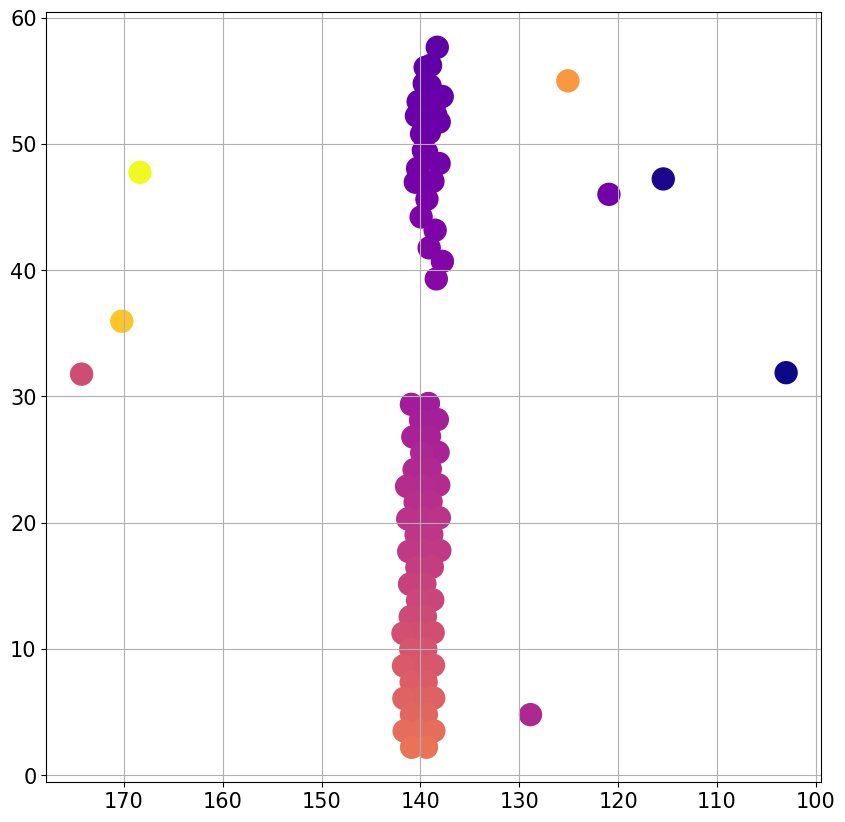

In [7]:
PixelPhis      = Event.PixelObservables.PixelPhi
PixelThetas    = Event.PixelObservables.PixelTheta
PulseCentroids = Event.PixelObservables.PulseCentroid*100
PixelCharges   = Event.PixelObservables.Charge
Elevations     = 90 - PixelThetas
StationPhi     = Event.StationPhi
StationTheta   = Event.StationTheta
StationElevation = 90 - StationTheta
StationTime    = Event.StationTime

PlotID = 1
size = 250
fig = plt.figure(figsize = (10,10))
# Plotting Telescope Gray Pixels
offset = 30
# plt.scatter(AllpixelPhis+offset,AllpixelElev,c='grey',alpha= 0.5,s=size)
# # plt.scatter(AllpixelPhis+offset,AllpixelElev,c='grey',alpha= 0.5,s=size)

plt.scatter(PixelPhis,Elevations,c=PulseCentroids,cmap='plasma',s=size)
# plt.scatter(StationPhi,StationElevation,marker='x',s=size,c=[Event.StationTime])
plt.gca().invert_xaxis()
plt.grid()

In [8]:
# def IsNeighboursAllPixels(Pixel1pos,Pixel2pos):
#     # Check if pixels are withing 2 units of each other
#     # Pixel1pos = [phi,elevation]
#     # Pixel2pos = [phi,elevation]
#     if (Pixel1pos[0] - Pixel2pos[0])**2 + (Pixel1pos[1] - Pixel2pos[1])**2 < 4:
#         return True
    
# G = nx.Graph()

# for i in range(len(AllpixelPhis)):
#     G.add_node(i, Phi=AllpixelPhis[i]+30, Theta=AllpixelElev[i])

# for i in range(440):
#     for j in range(440):
#         if j == i:
#             continue
#         if IsNeighboursAllPixels([AllpixelPhis[i],AllpixelElev[i]],[AllpixelPhis[j],AllpixelElev[j]]):
#             G.add_edge(i, j)

# fig, ax = plt.subplots(1,1,figsize=(15,15))
# pos = {node : (G.nodes[node]['Phi'],G.nodes[node]['Theta']) for node in G.nodes}
# # Assign color by Charge
# # node_colors = [G.nodes[node]['Charge'] for node in G.nodes]
# # pos = nx.spring_layout(G,pos=pos)
# # ax.grid()
# # Filter Graph of noise pixels

# # nx.draw_networkx_nodes(G,pos=pos,ax=ax,node_size=250,node_color='gray')
# # nx.draw_networkx_edges(G,pos=pos,ax=ax)
# # ax.xlabel('Phi')
# # ax.ylabel('Theta')
# ax.grid()
# ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
# ax.set_xlabel('Phi')
# ax.set_ylabel('Elevation')
# ax.invert_xaxis()
# ax.scatter(PixelPhis,Elevations,c=PulseCentroids,cmap='plasma',s=size)

# # plt.gca().invert_xaxis()

In [9]:
def PlotAdjacency(Adjacency):
    plt.figure(figsize = [20,20])
    plt.imshow(Adjacency)
    for i in range(len(Adjacency)):
        if torch.sum(Adjacency[i]) == 0:
            plt.axvline(i,color='red')
            plt.axhline(i,color='red')
    plt.show()

# PlotAdjacency(Adjacency)

In [12]:
def PlotGraph(Pixels,Adjacency):
    plt.figure(figsize = [15,15])
    for i in range(len(Adjacency)):
        for j in range(len(Adjacency)):
            if Adjacency[i,j] == 1:
                plt.plot([Pixels[i,9],Pixels[j,9]],[90-Pixels[i,10],90-Pixels[j,10]],c='black',alpha=0.2,zorder = 1)
    plt.scatter(Pixels[:,9][torch.sum(Adjacency,dim=1)!=0],90-Pixels[:,10][torch.sum(Adjacency,dim=1)!=0],c=Pixels[:,4][torch.sum(Adjacency,dim=1)!=0],cmap='plasma',s = 100,zorder = 2)
    plt.scatter(Pixels[:,9][torch.sum(Adjacency,dim=1)==0],90-Pixels[:,10][torch.sum(Adjacency,dim=1)==0],color='k',s = 50,marker='x',zorder = 2)
    for i in range(len(Pixels)):
        plt.annotate(str(i),(Pixels[i,9],90-Pixels[i,10]))
    plt.grid()
    plt.xlabel('Phi')
    plt.ylabel('Elevation')
    
    x_center = (plt.xlim()[0] + plt.xlim()[1]) / 2  # Calculate the center of the x-axis
    threshold = 30
    if abs(x_center - plt.xlim()[0]) < threshold and abs(x_center - plt.xlim()[1]) < threshold:
        new_xlim = (x_center - threshold, x_center + threshold)
        plt.xlim(new_xlim)
    # Invert x axis
    plt.gca().invert_xaxis()
    plt.show()


# Testing for Proper Graph Production

Event 0,  ID: 100600101


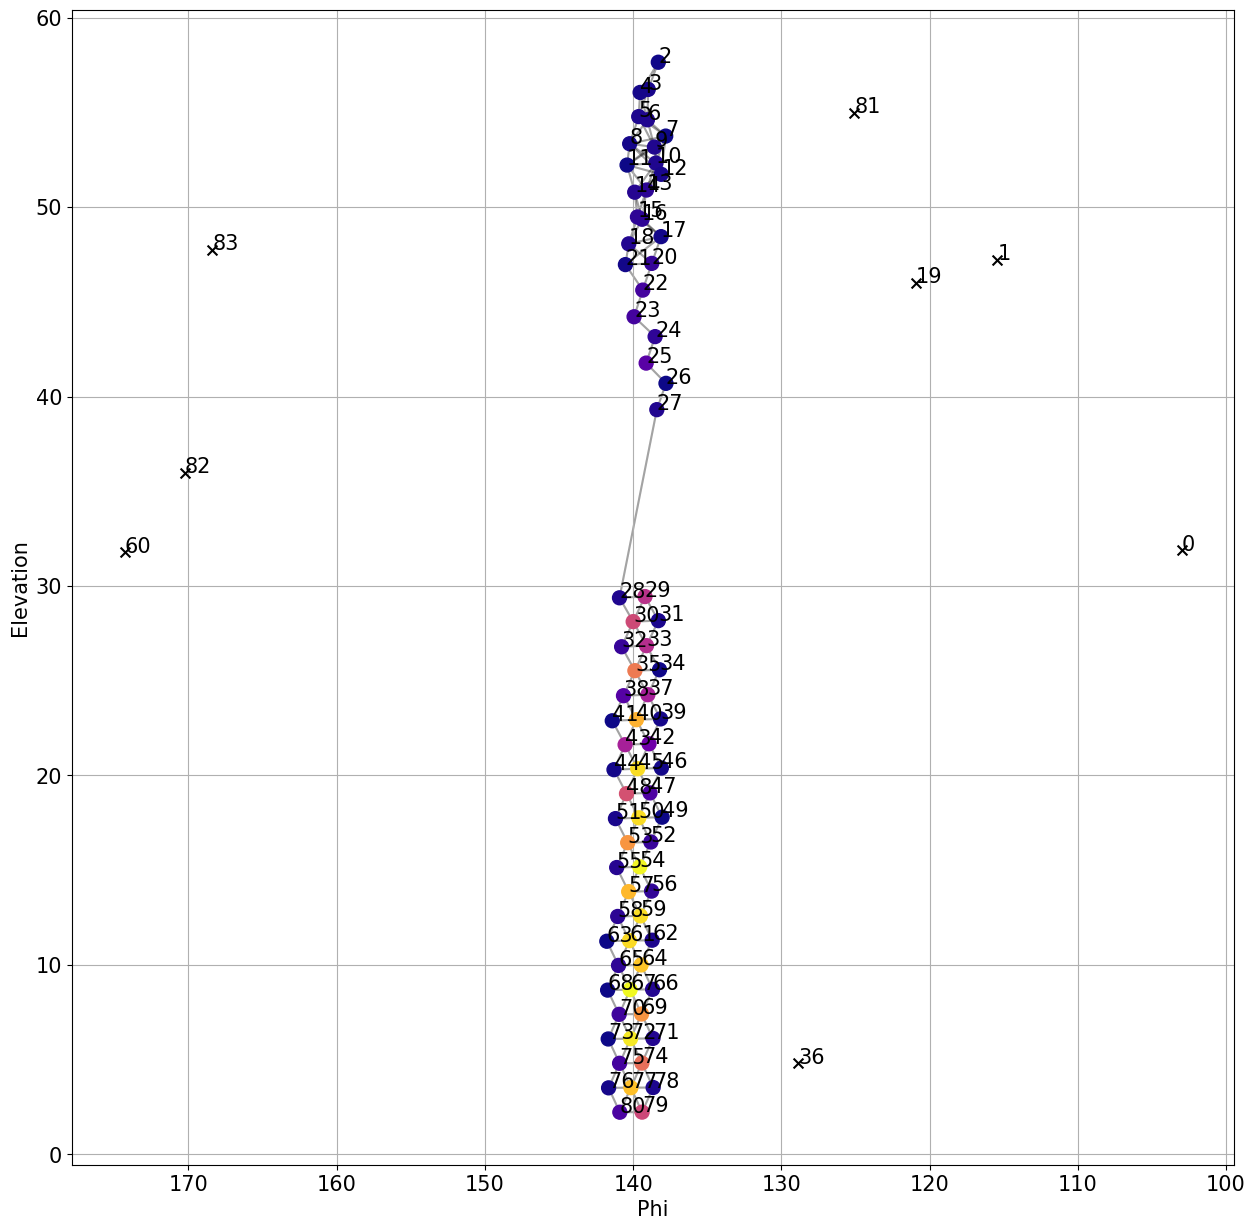

Event 1,  ID: 100710101


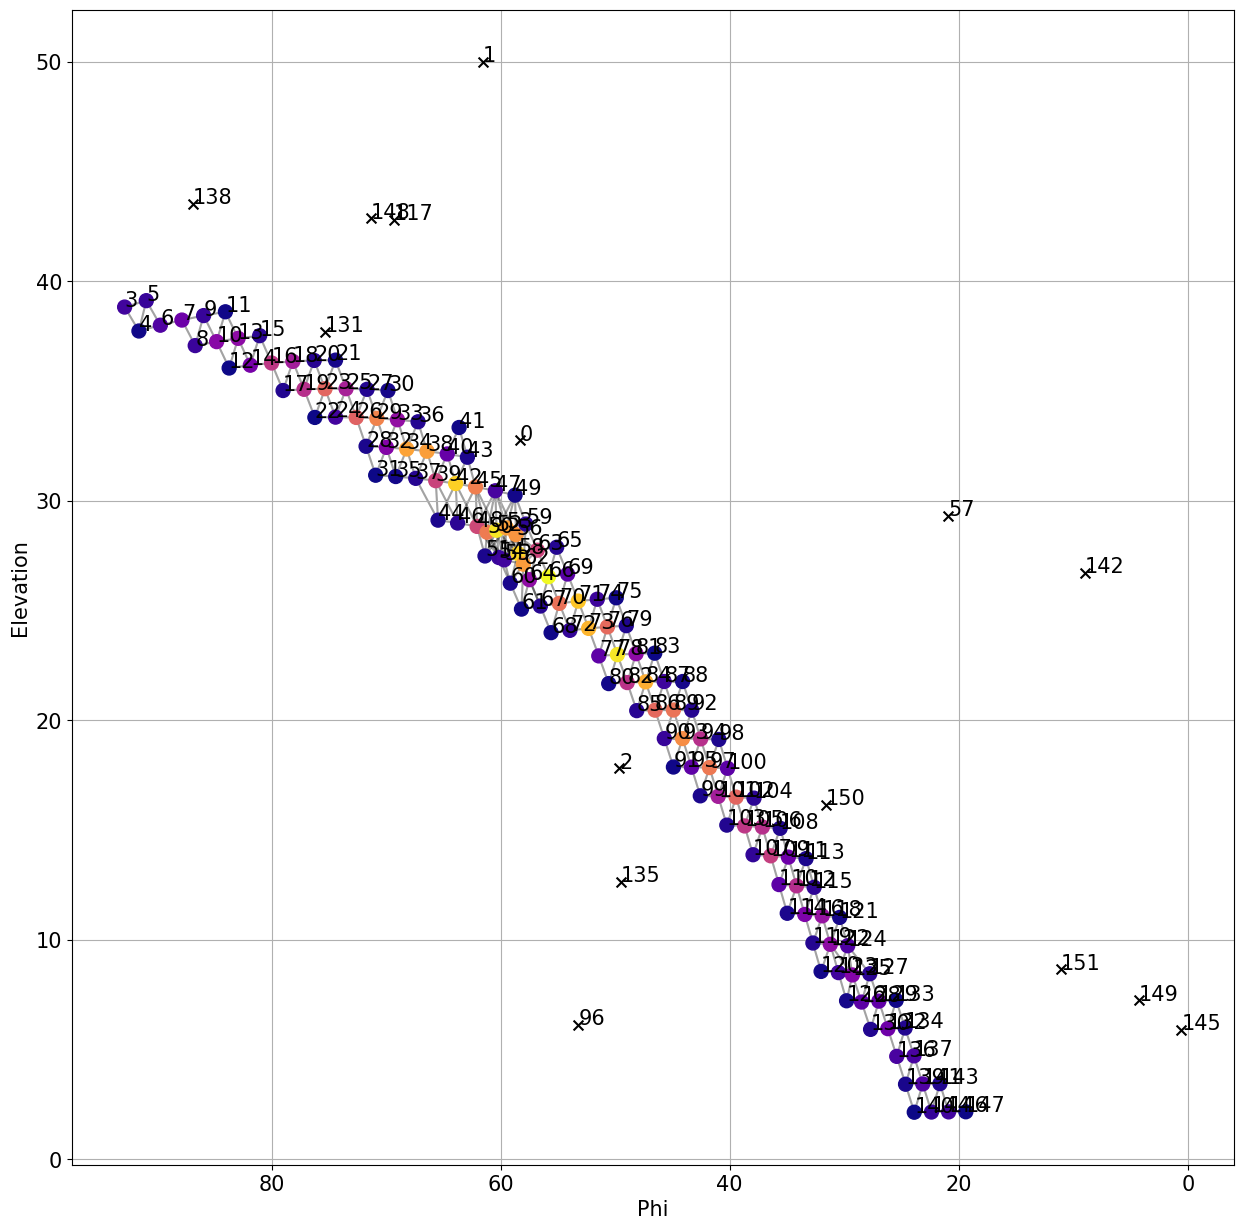

Event 2,  ID: 100950105


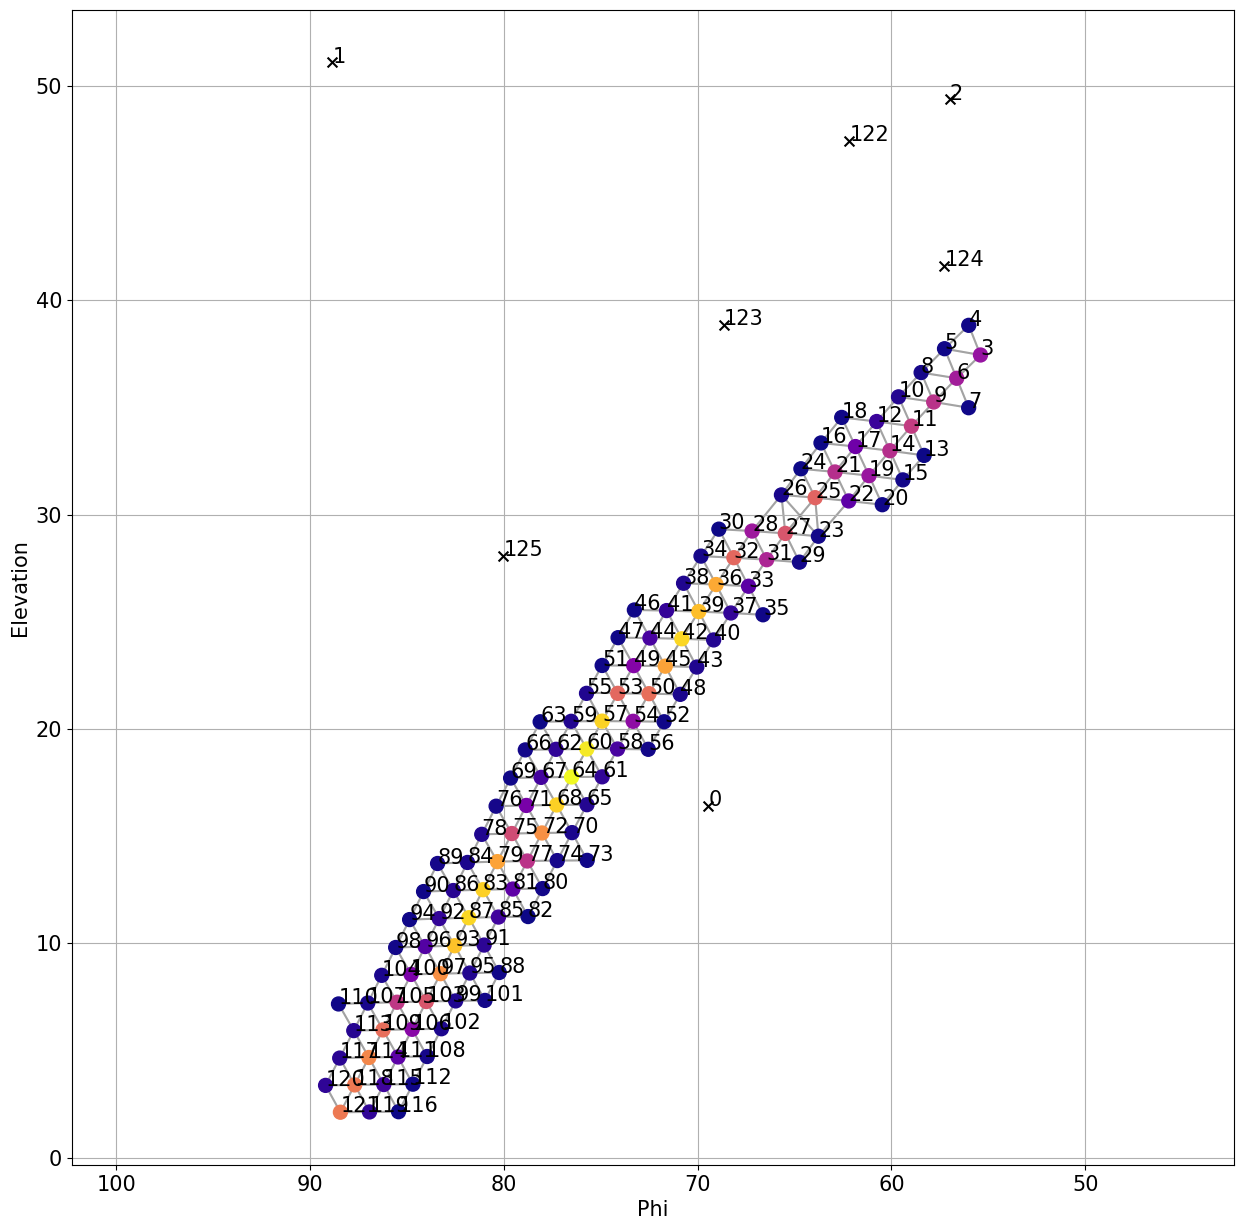

Event 3,  ID: 101090104


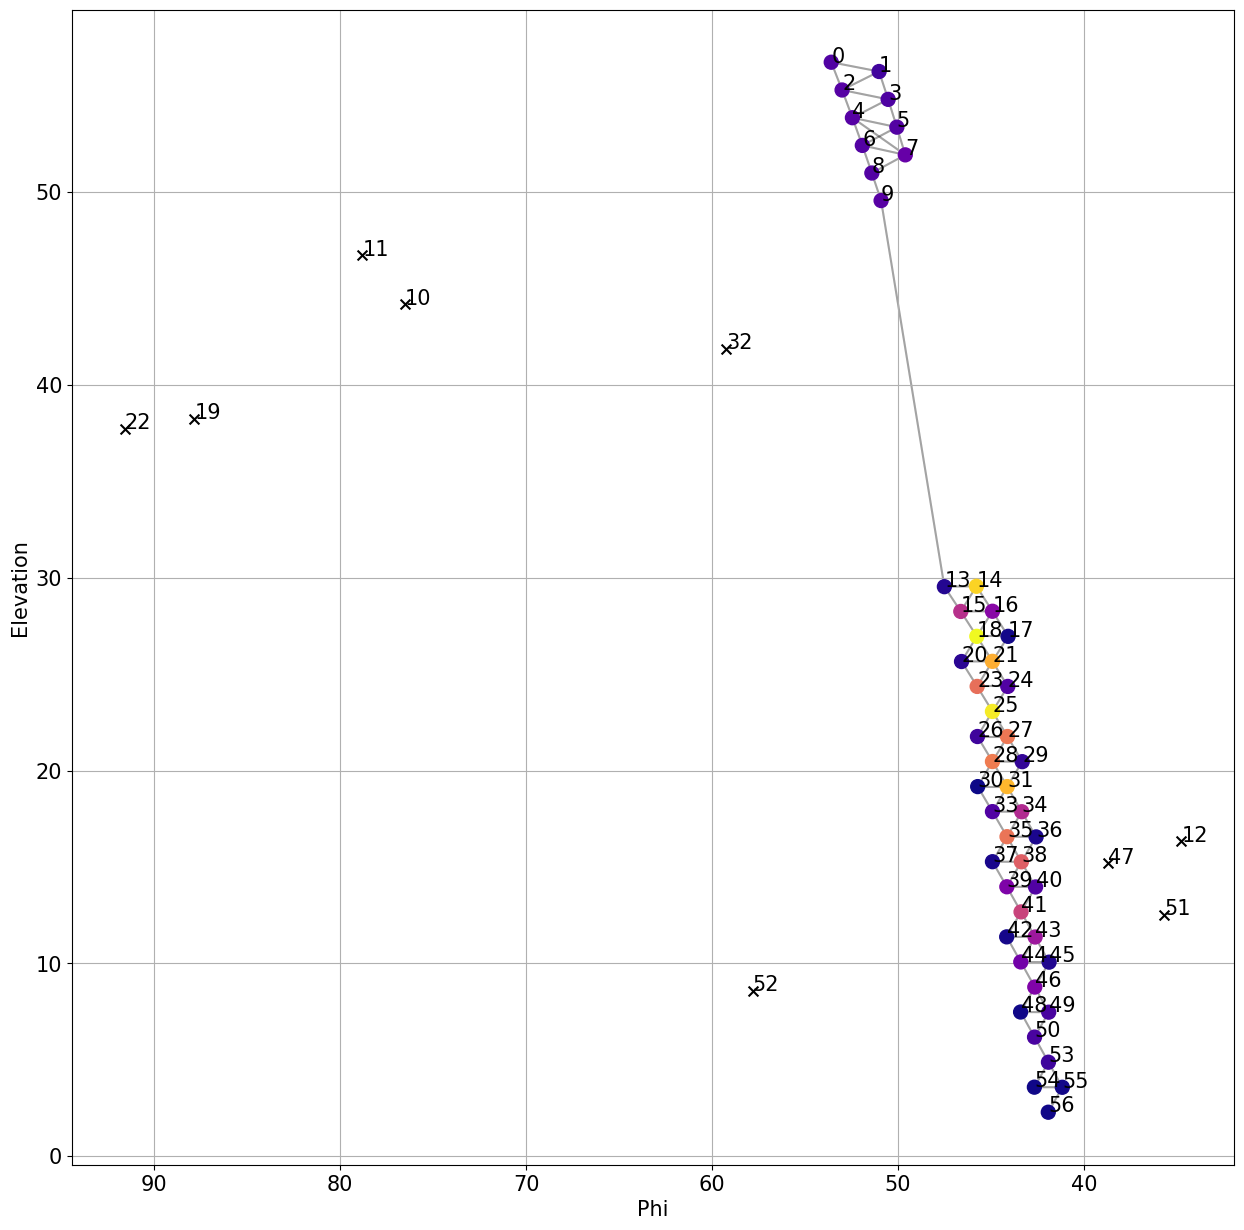

Event 4,  ID: 101160101


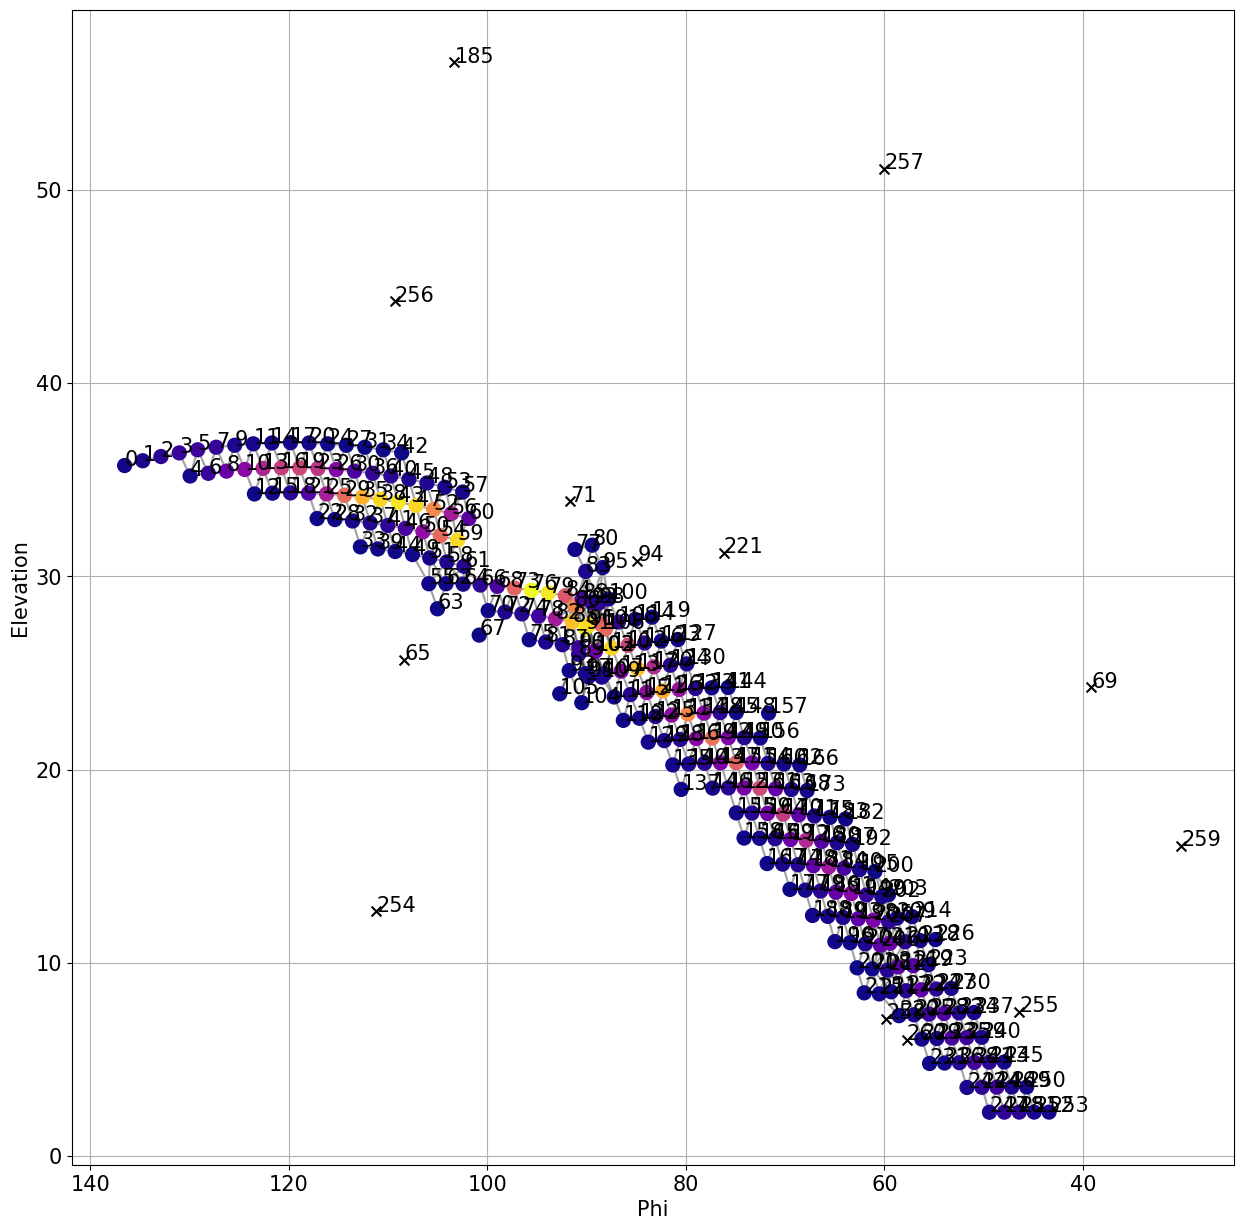

Event 5,  ID: 101580102


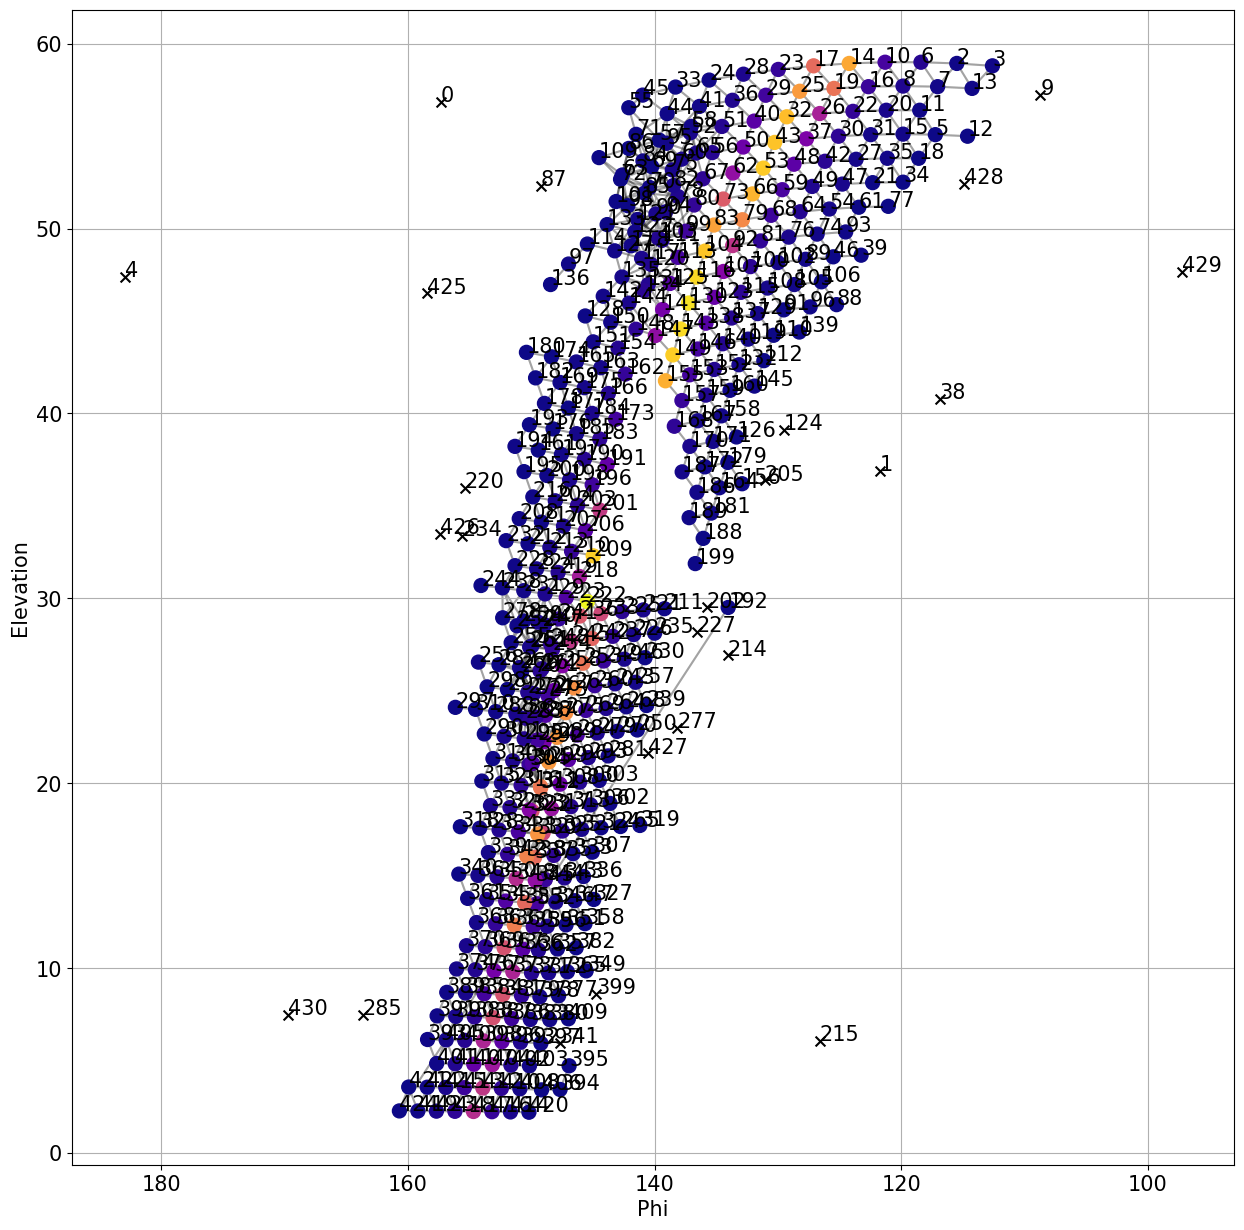

Event 6,  ID: 100560101


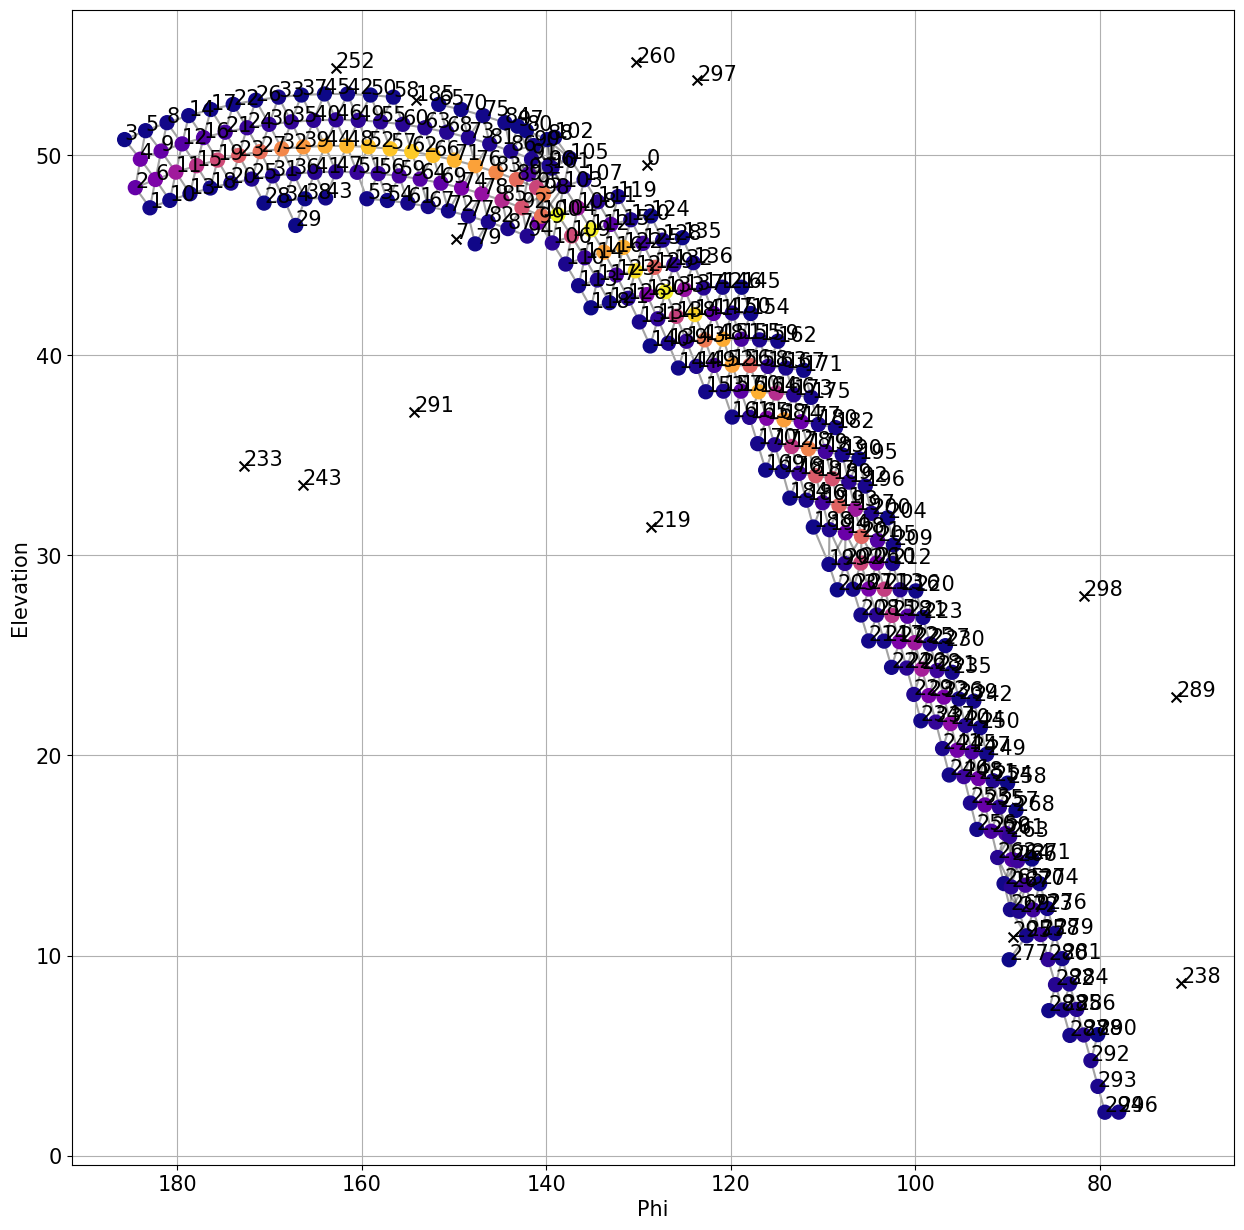

Event 7,  ID: 102400101


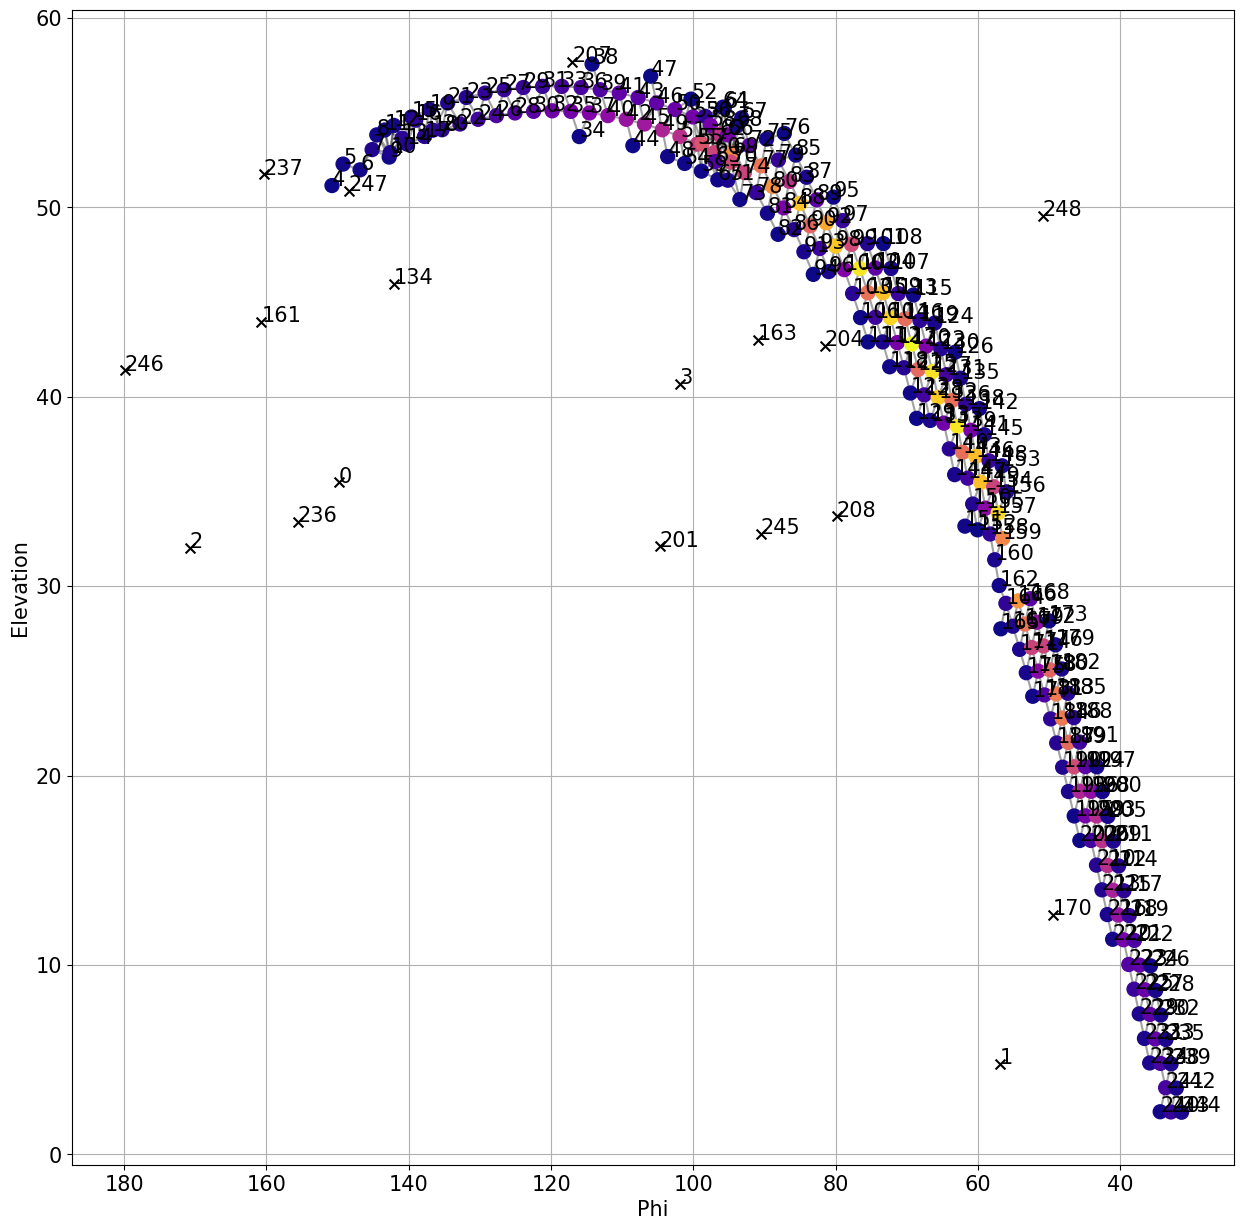

Event 8,  ID: 103160104


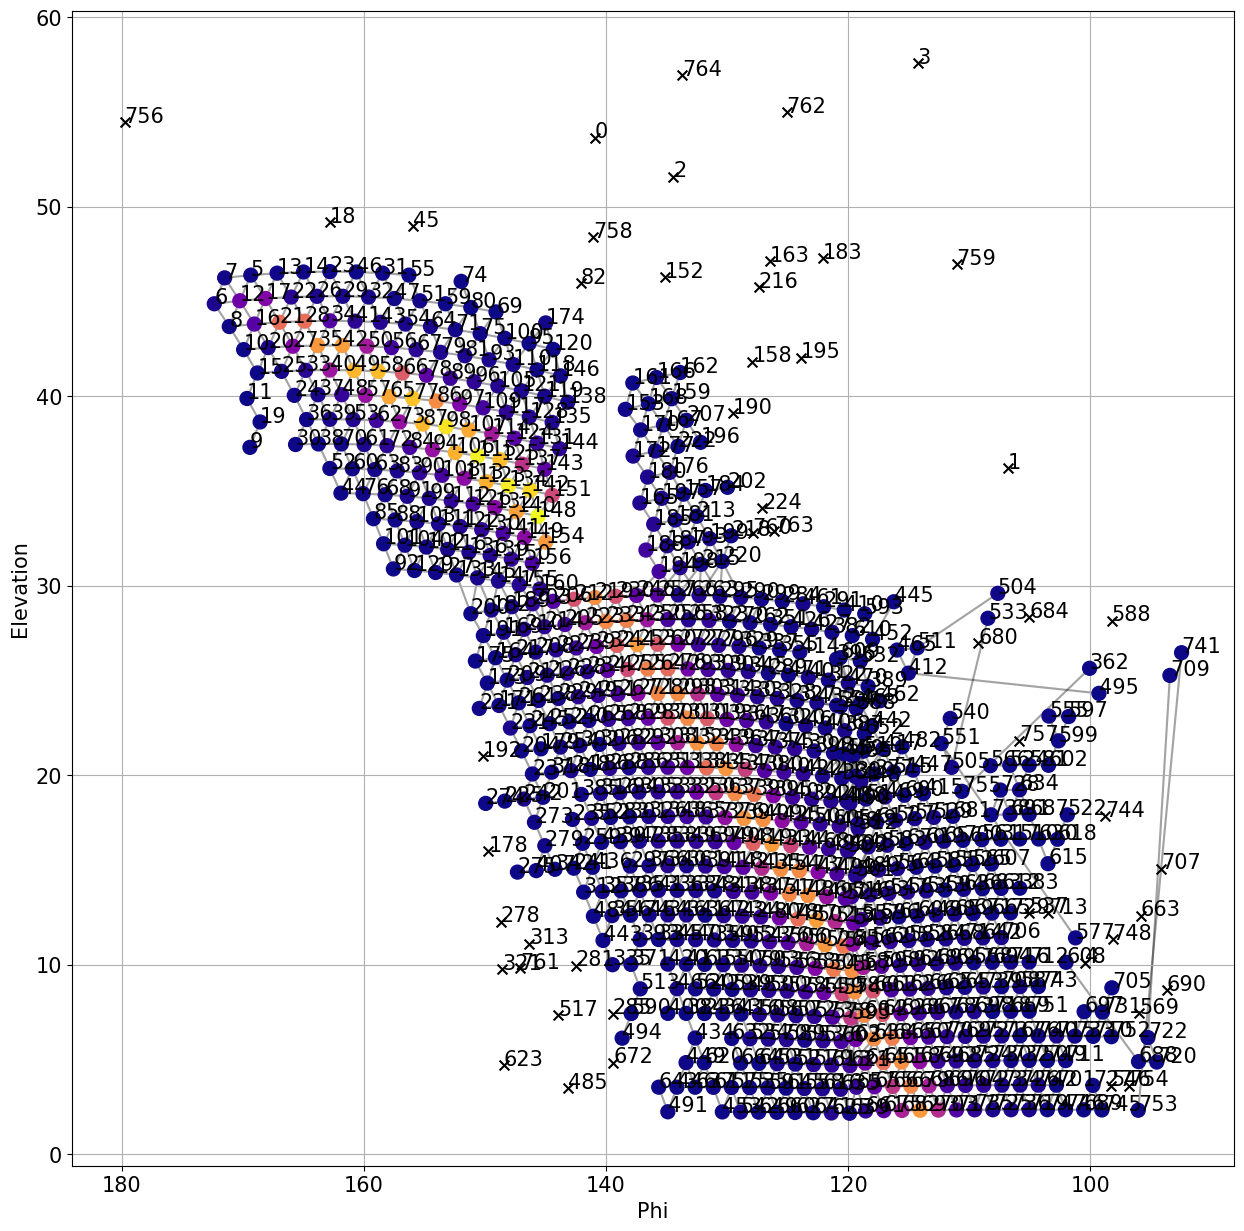

Event 9,  ID: 100000122


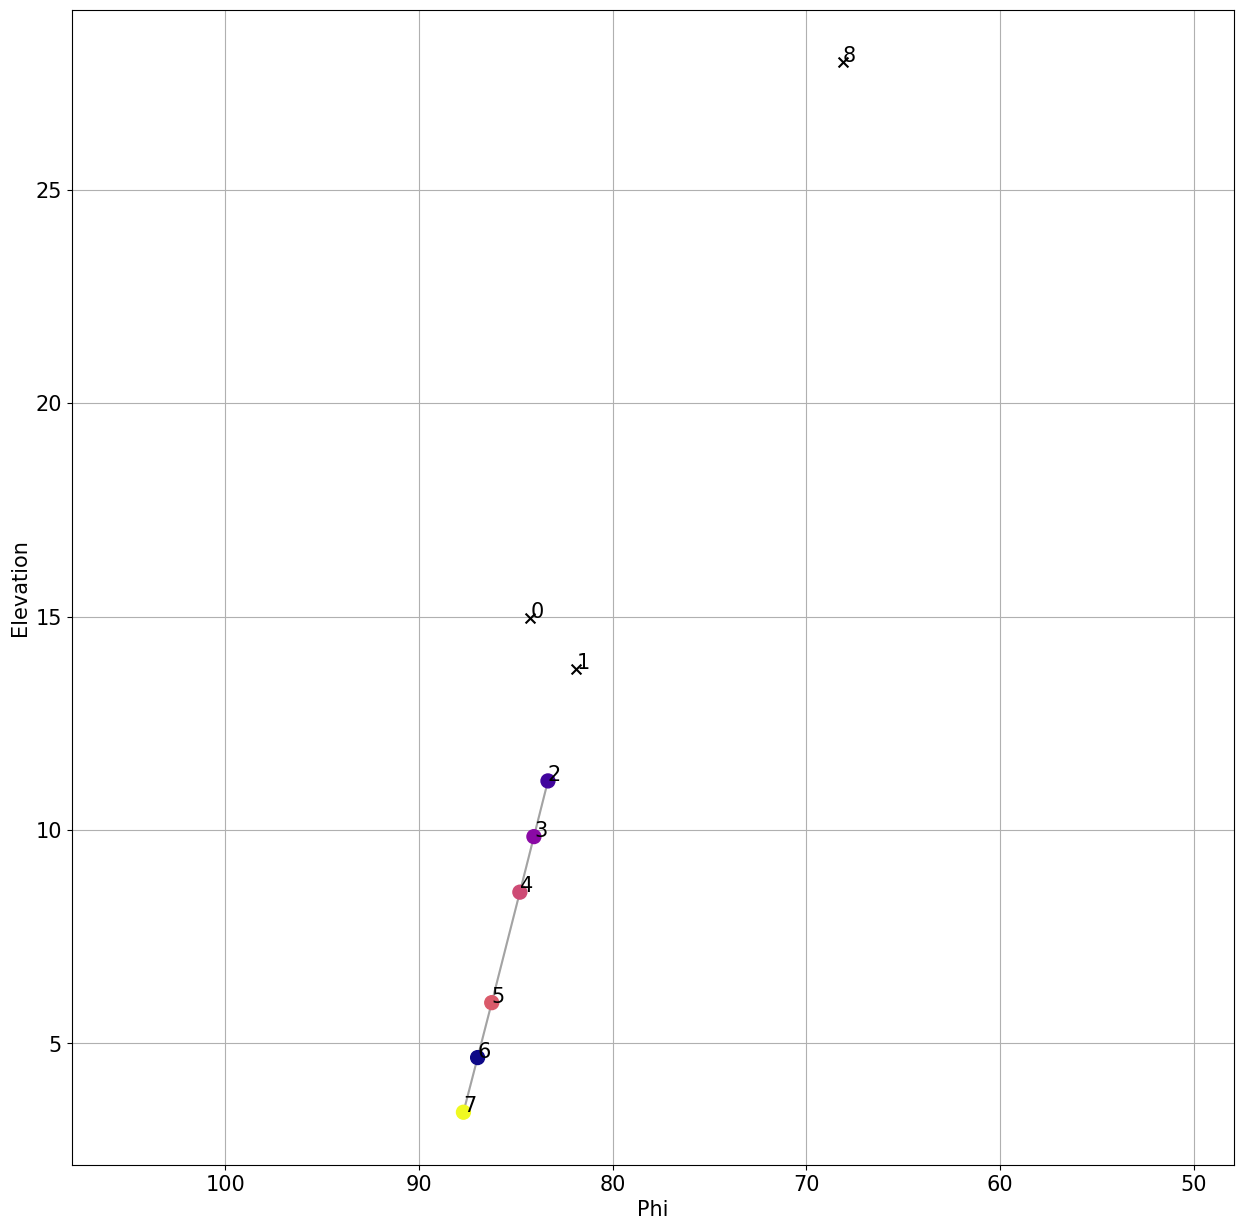

Event 10,  ID: 112130105


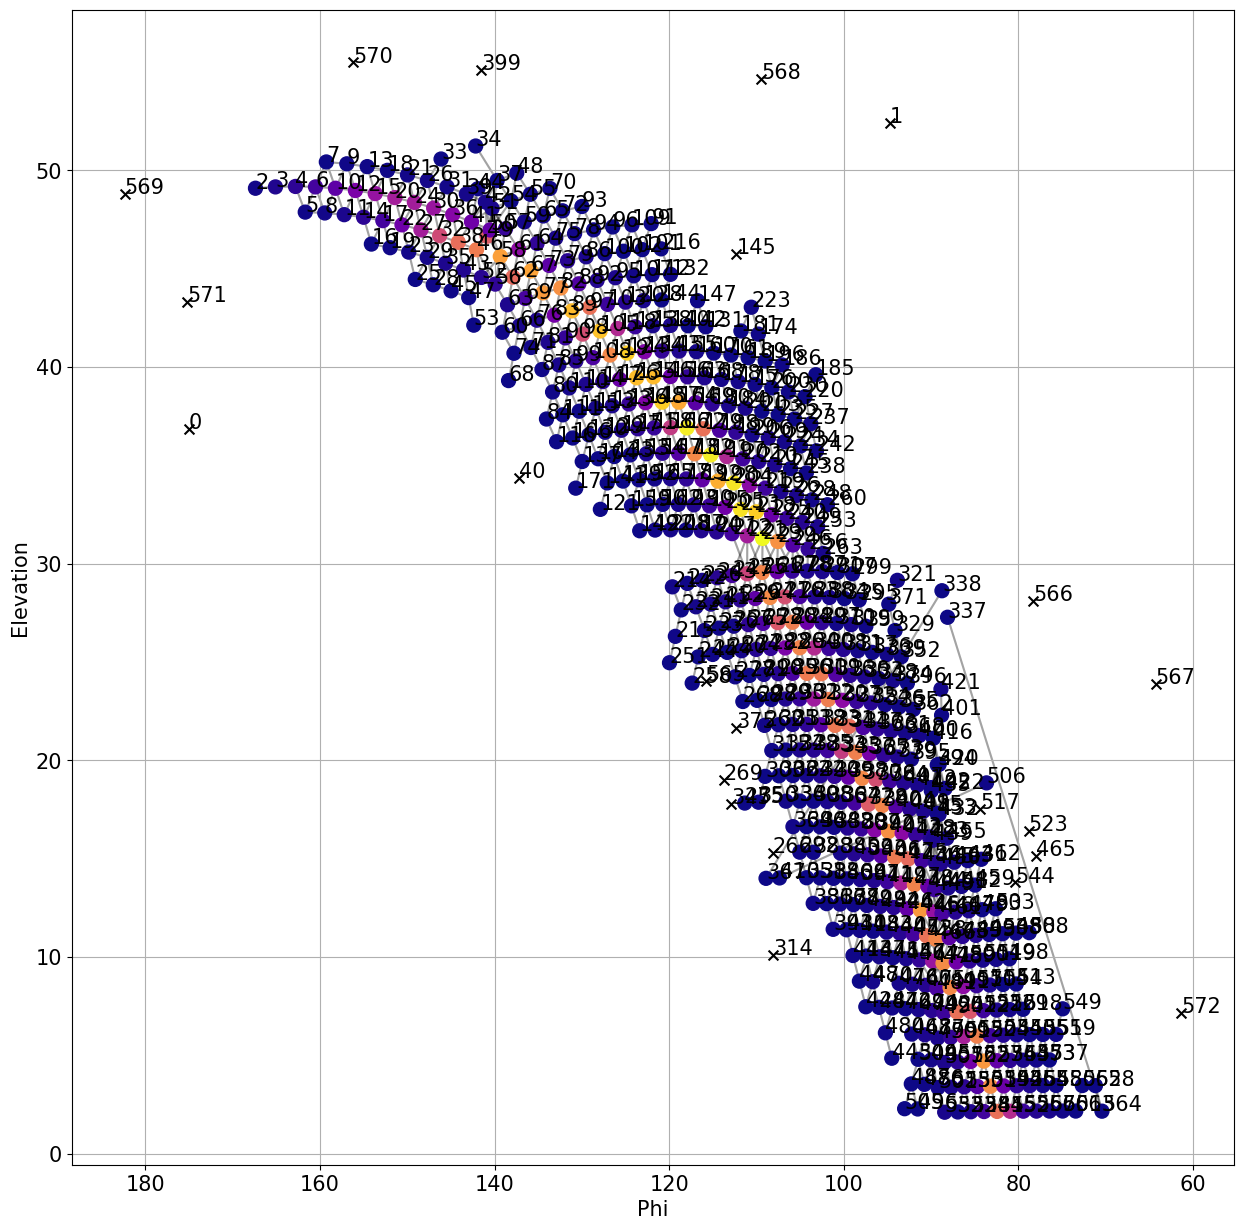

Event 11,  ID: 100250103


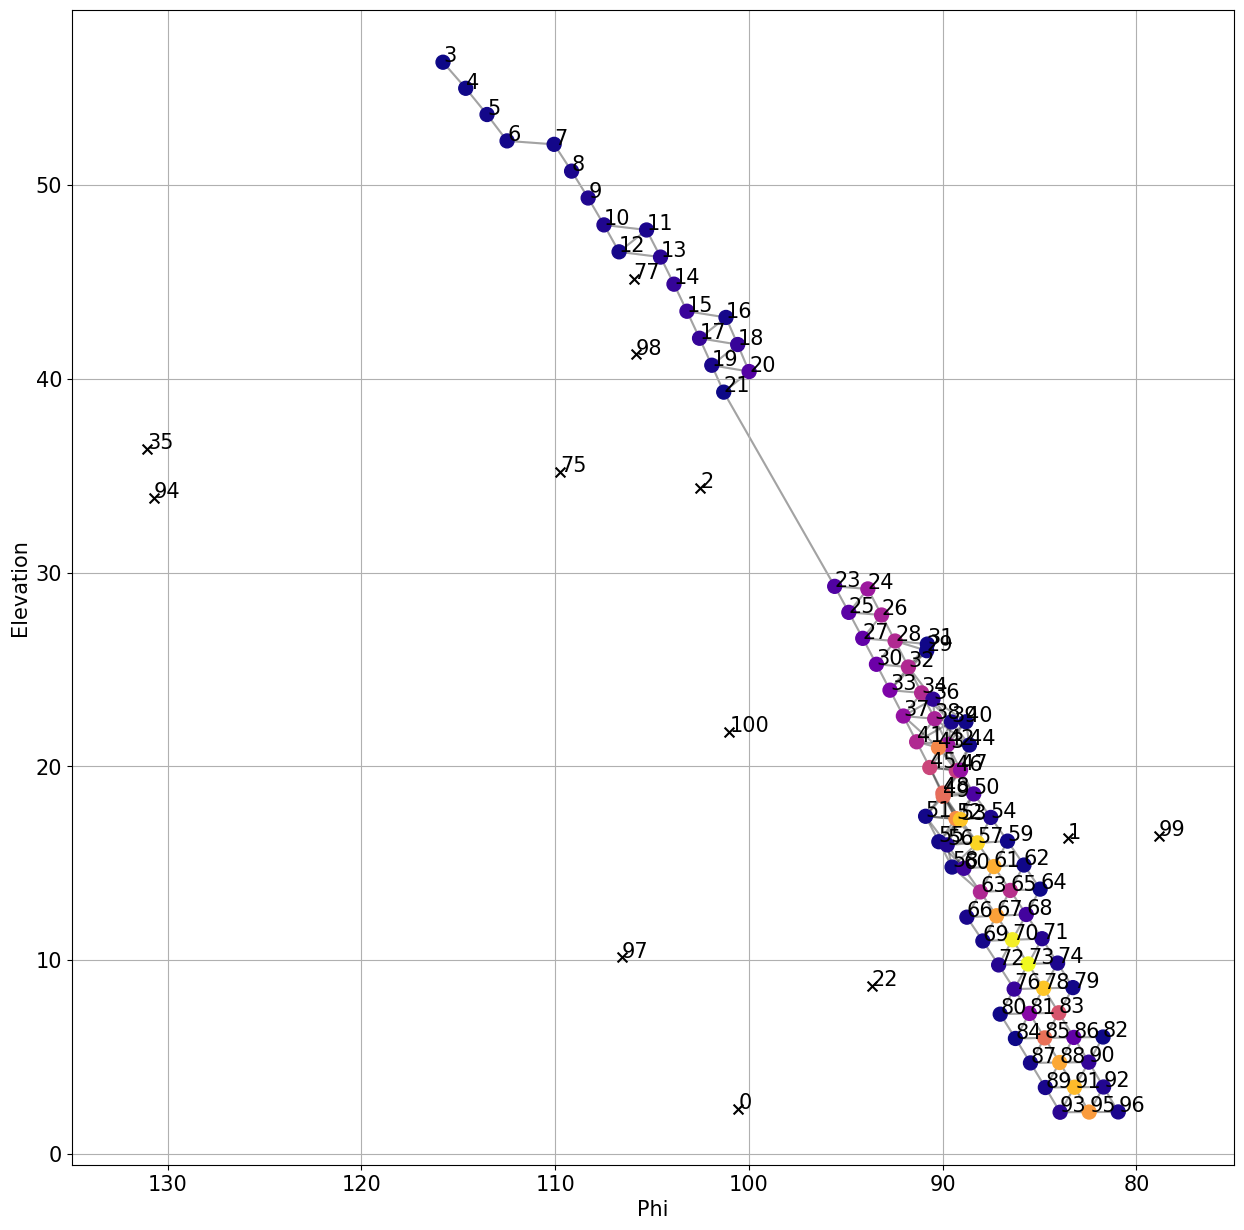

Event 12,  ID: 100000123


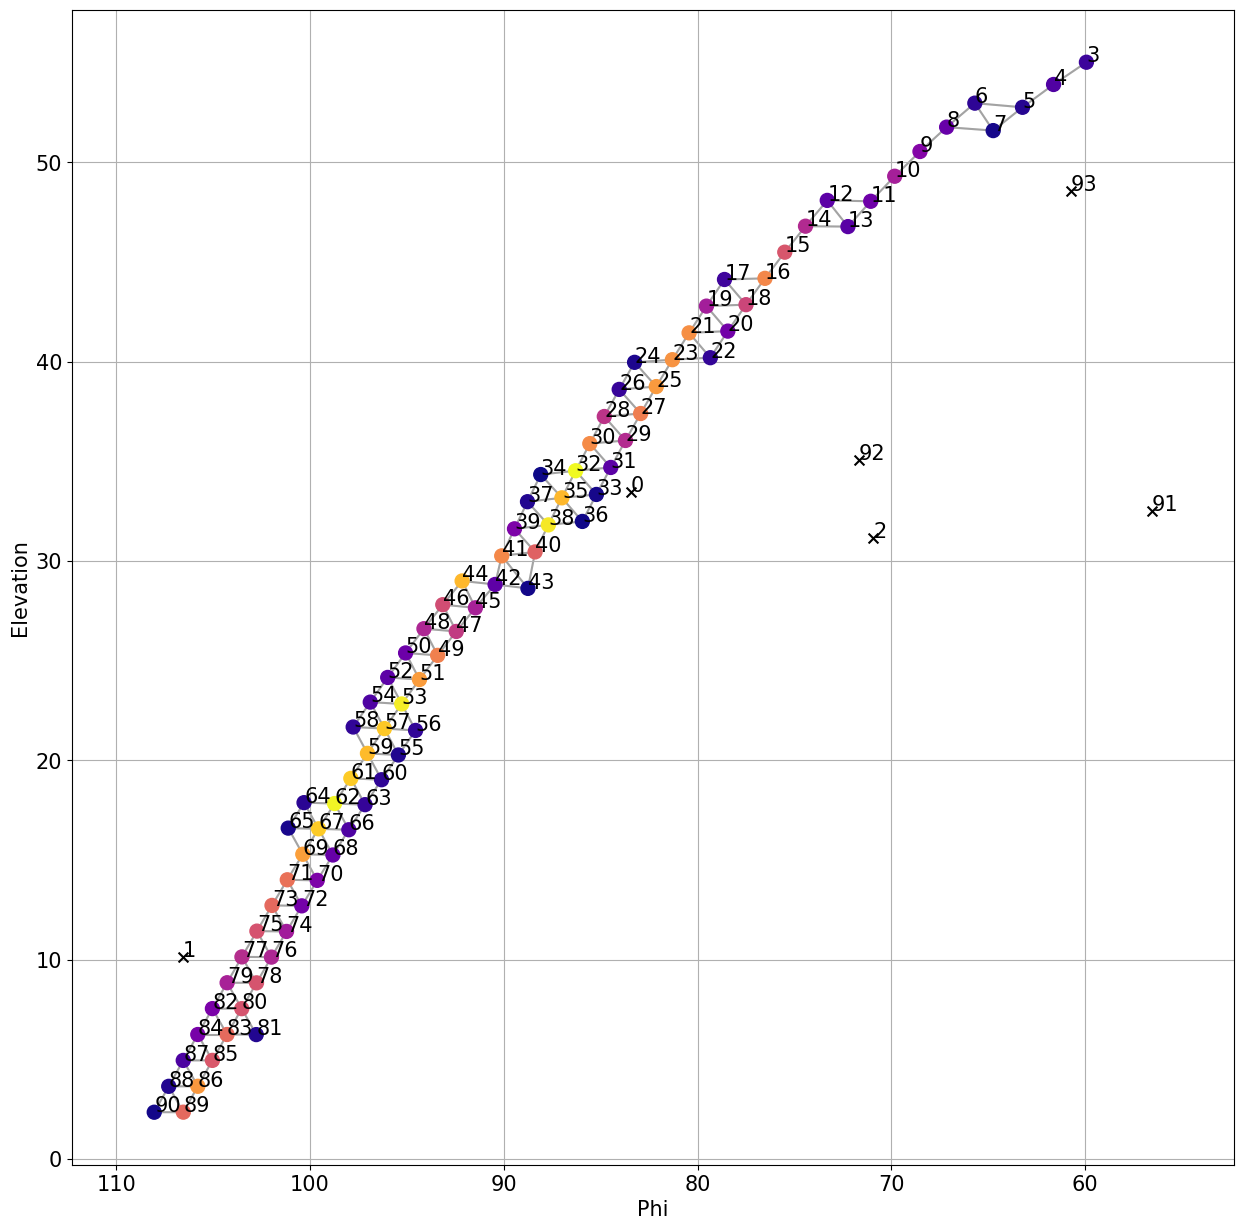

Event 13,  ID: 100000127


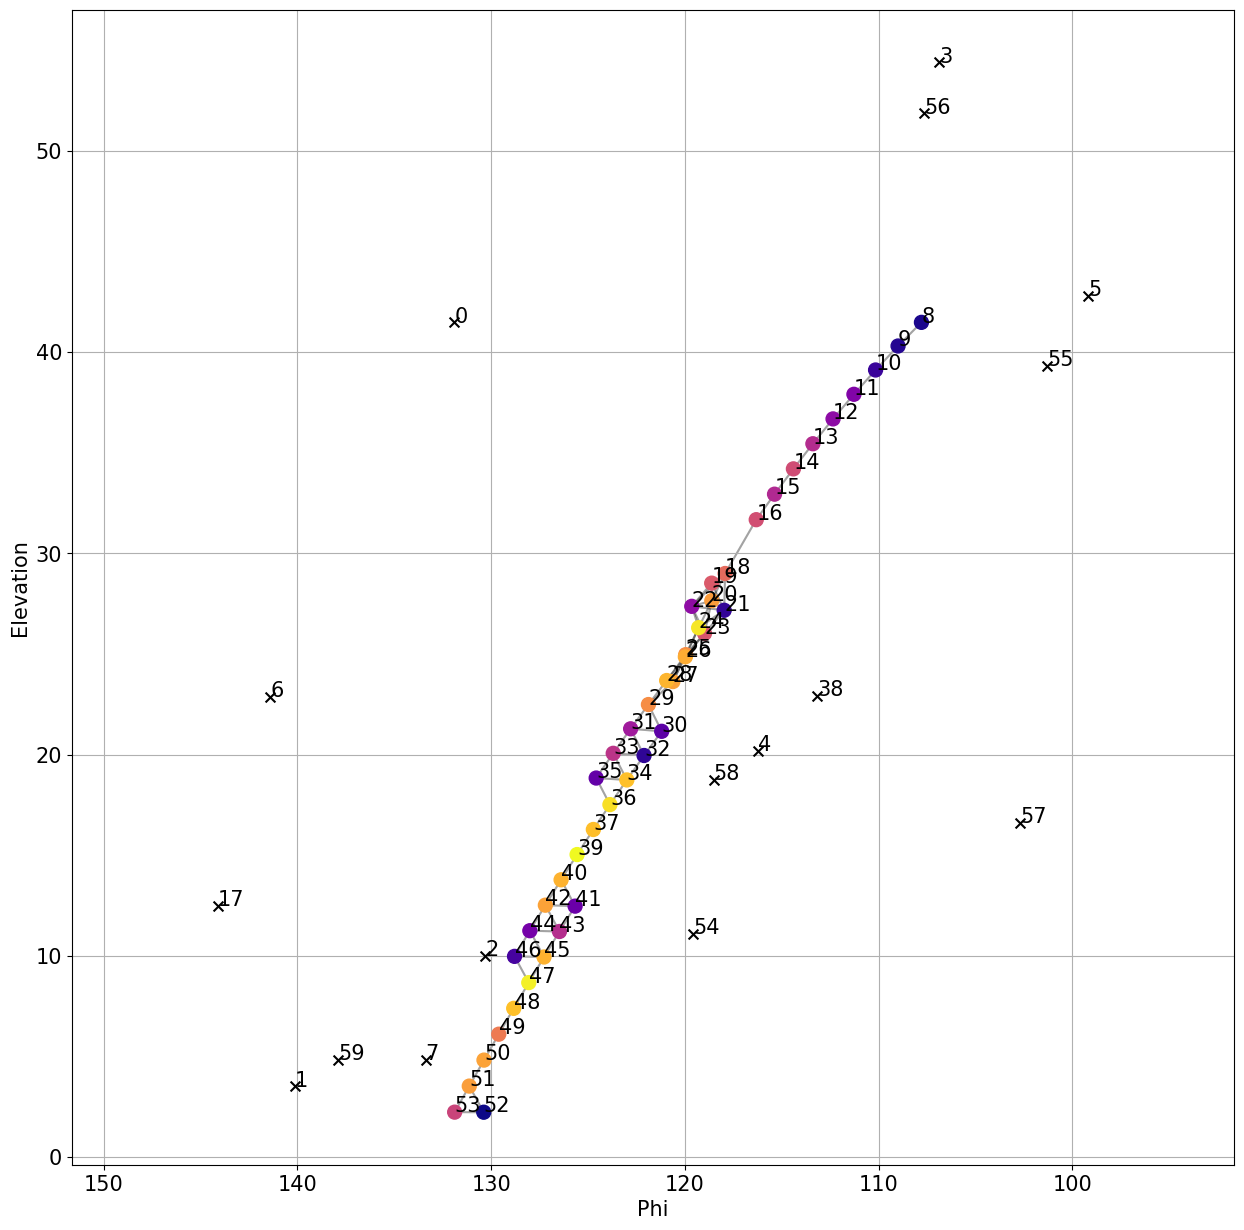

Event 14,  ID: 100020104


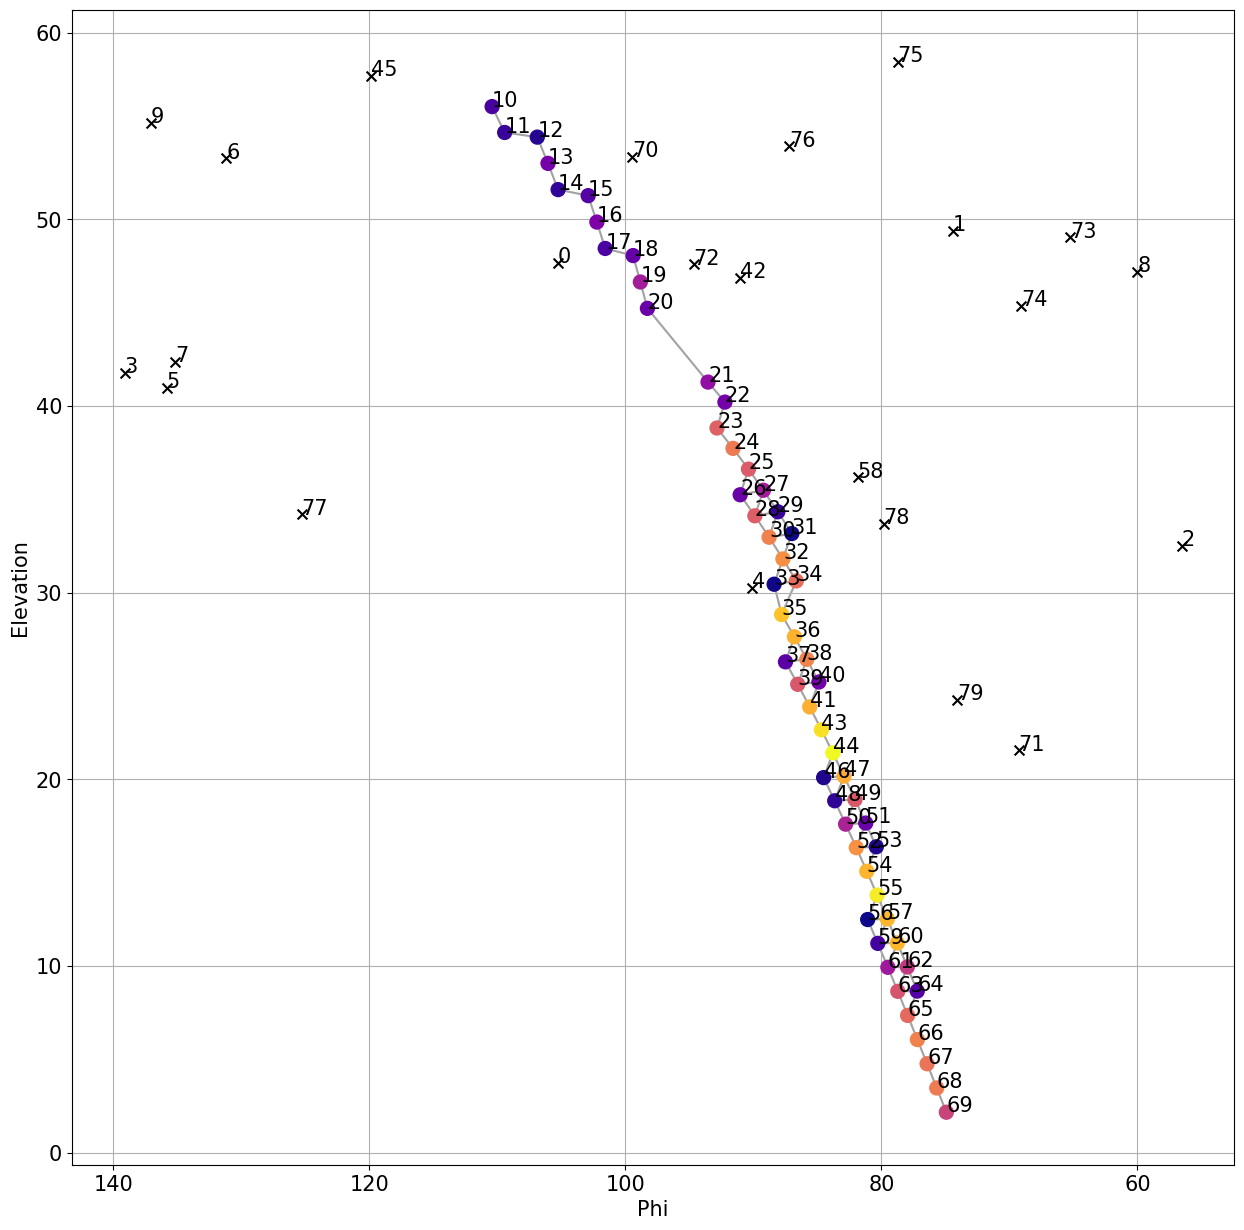

Event 15,  ID: 100050114


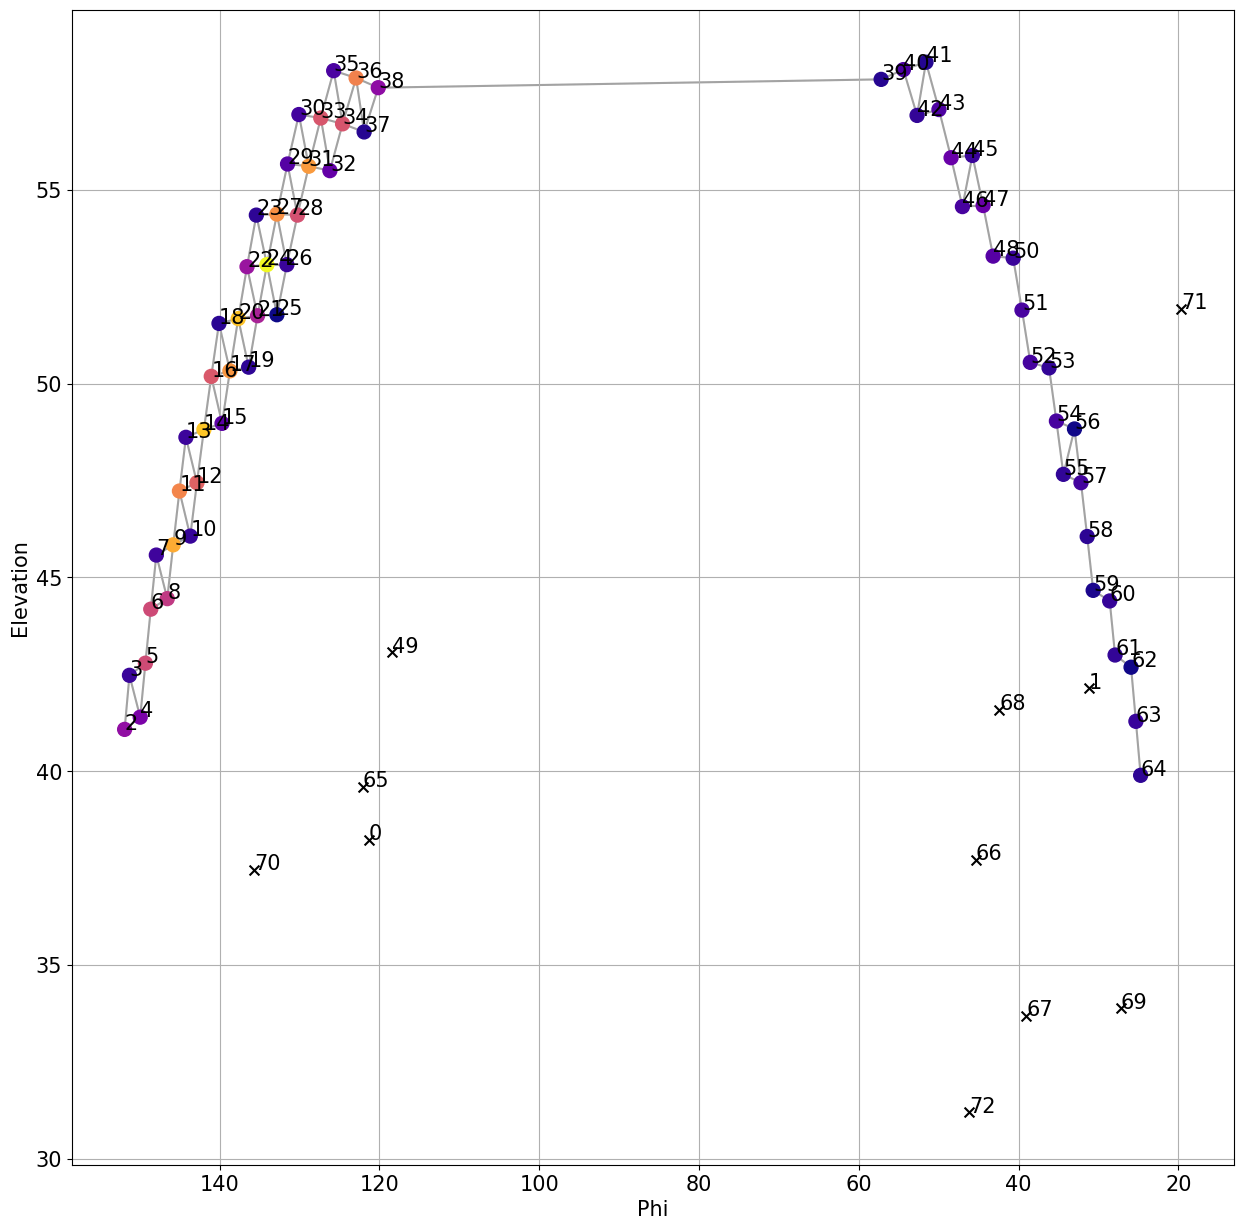

Event 16,  ID: 100050117


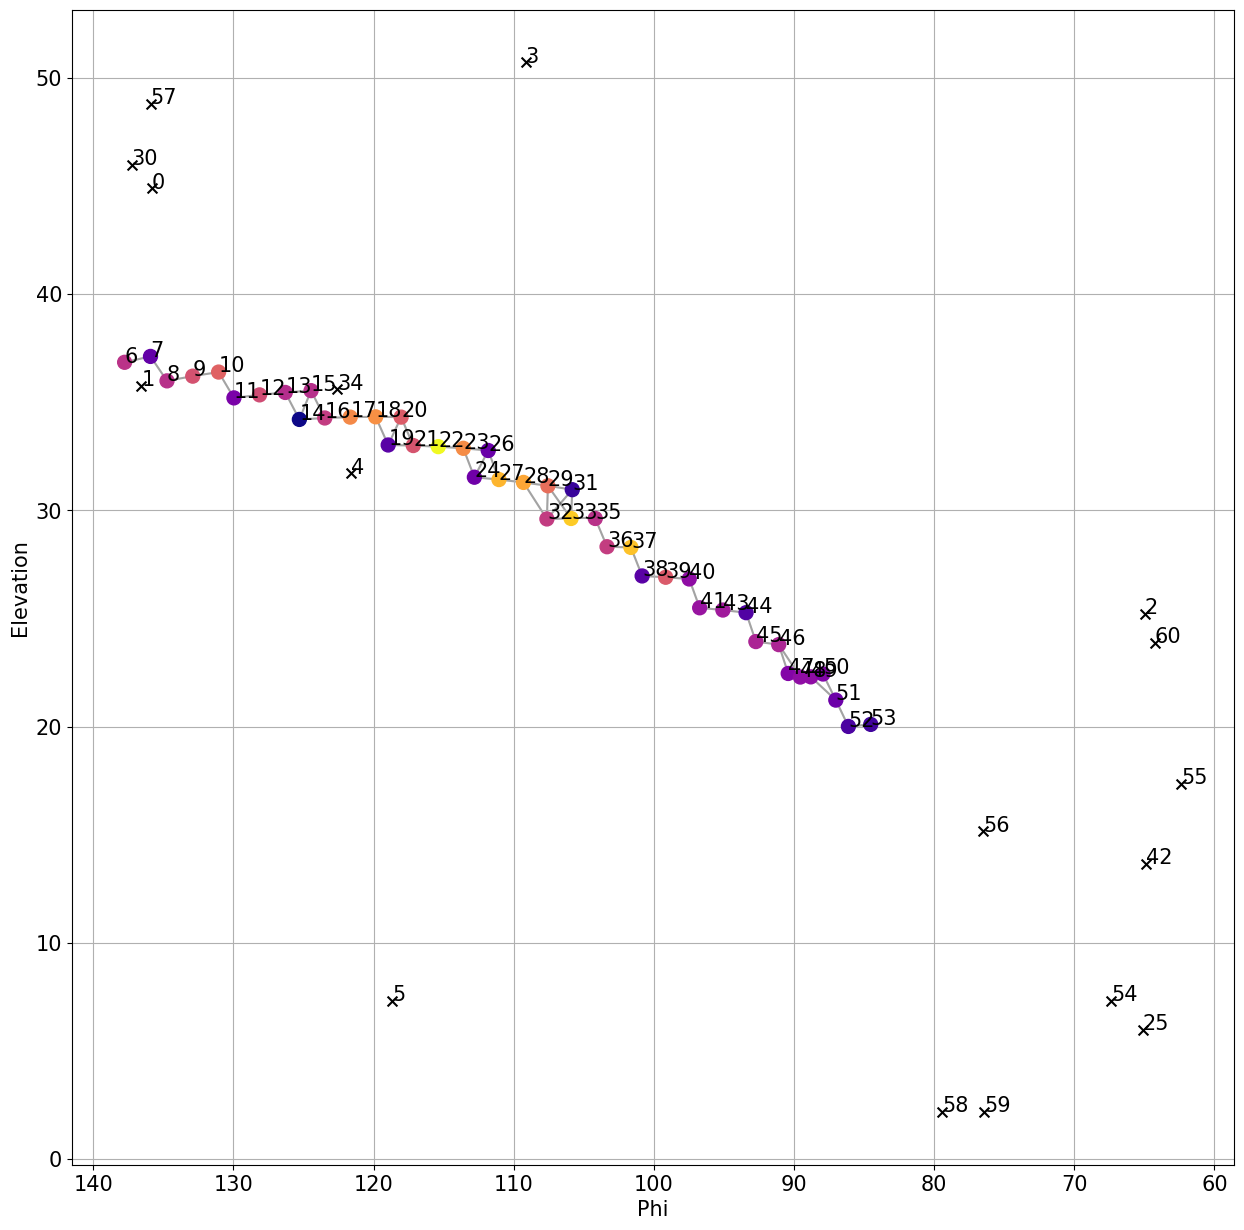

Event 17,  ID: 100060124


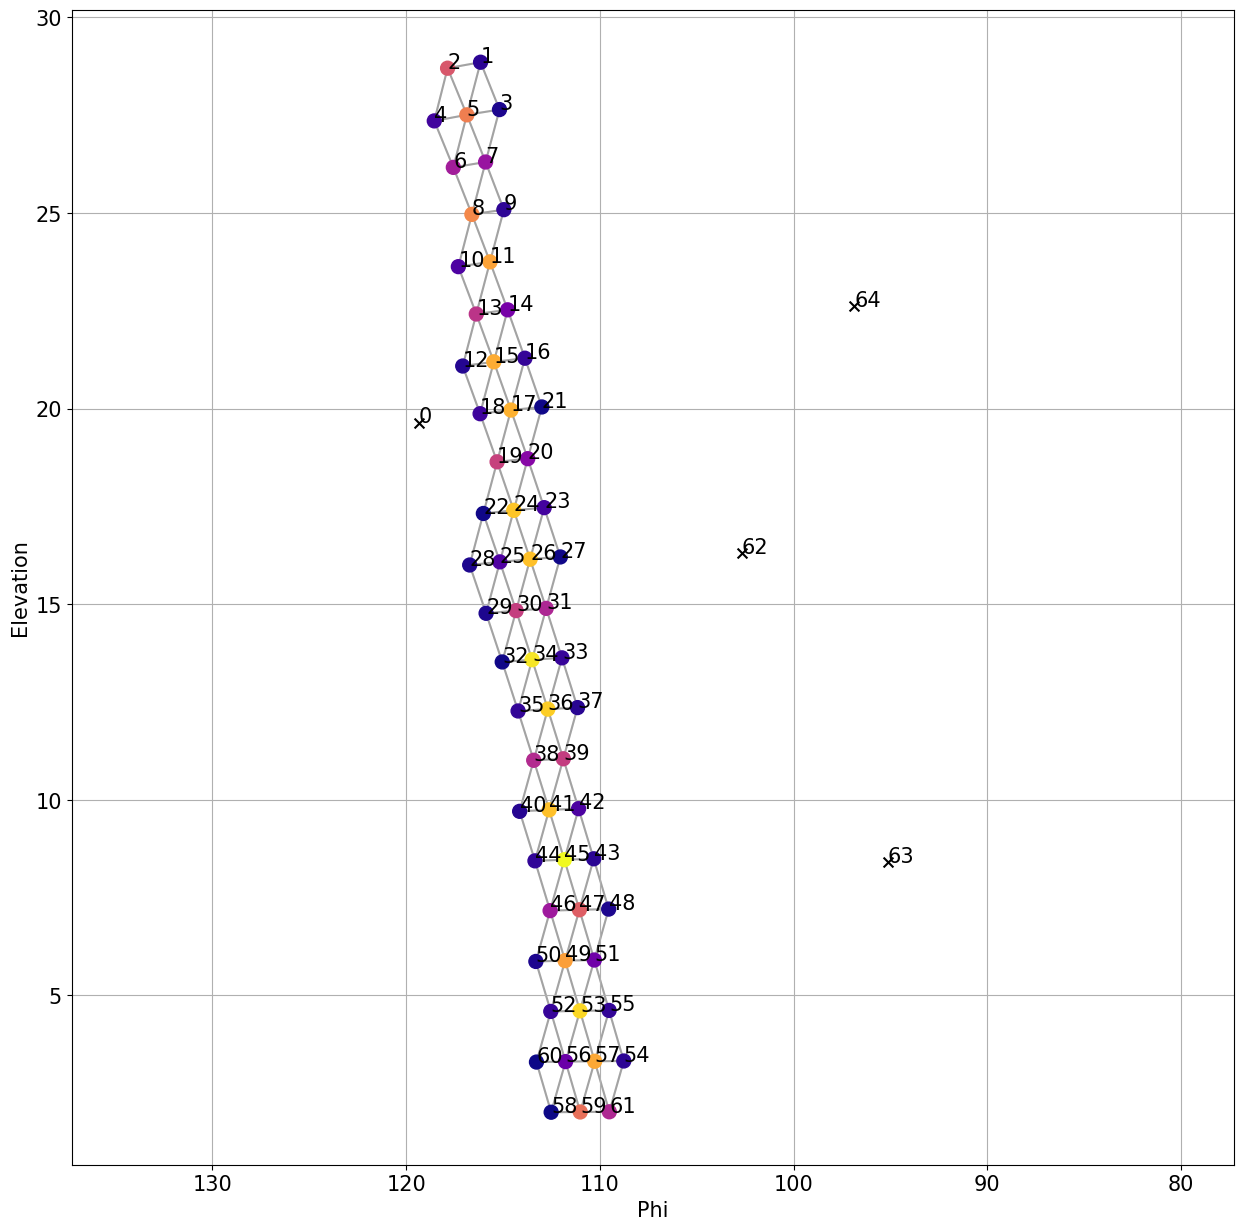

Event 18,  ID: 100030102


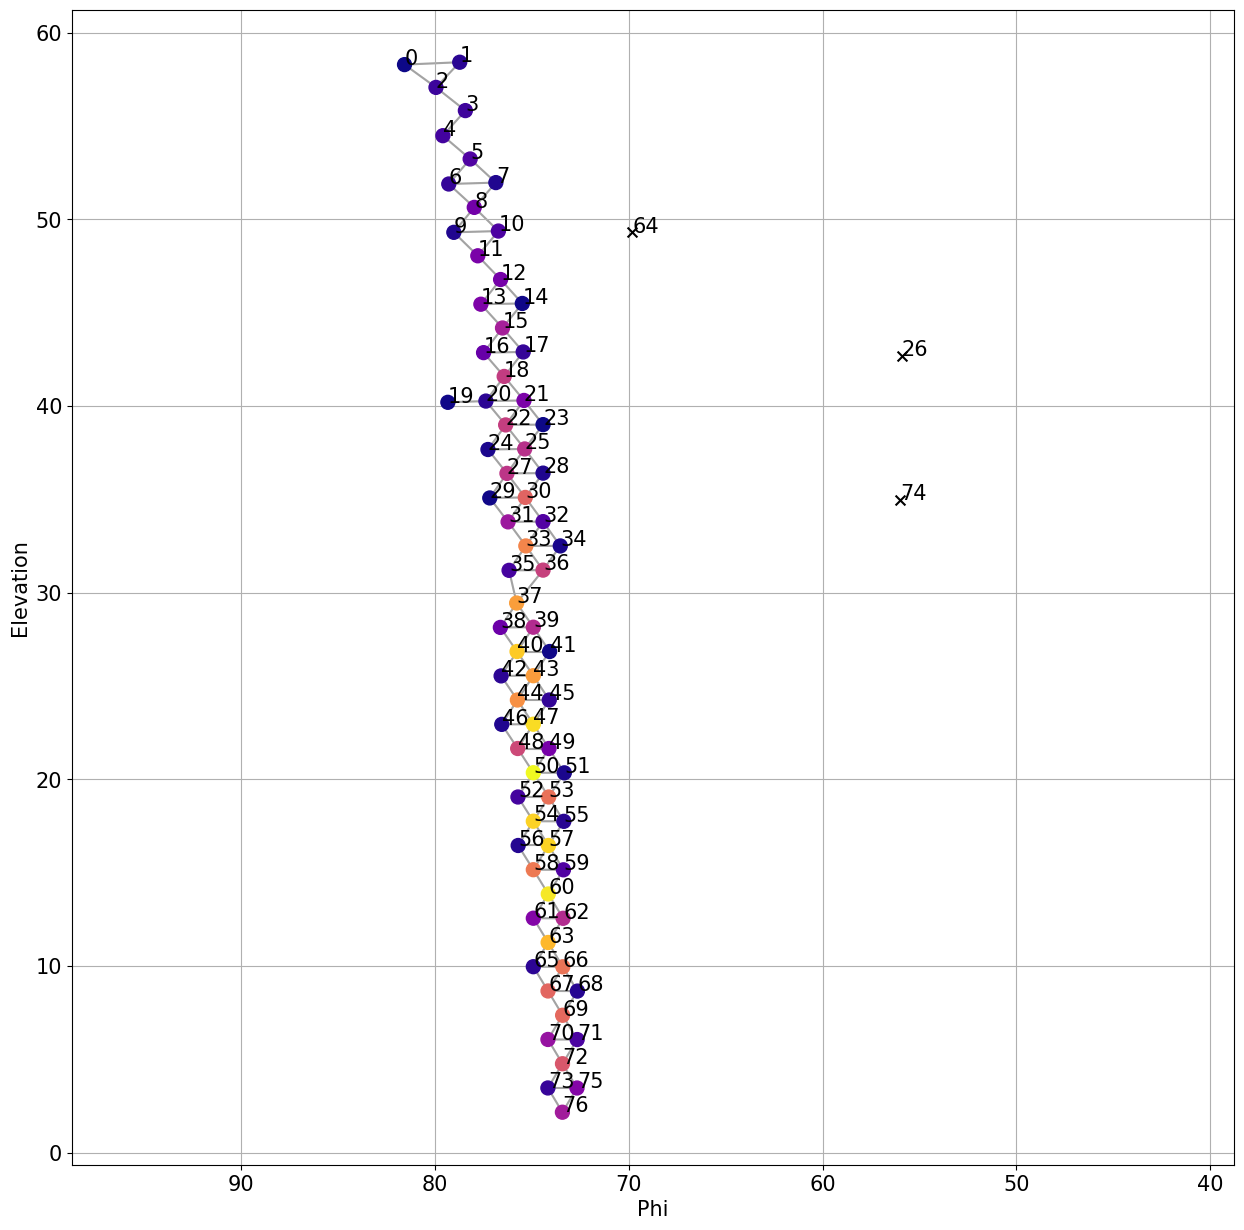

Event 19,  ID: 100040103


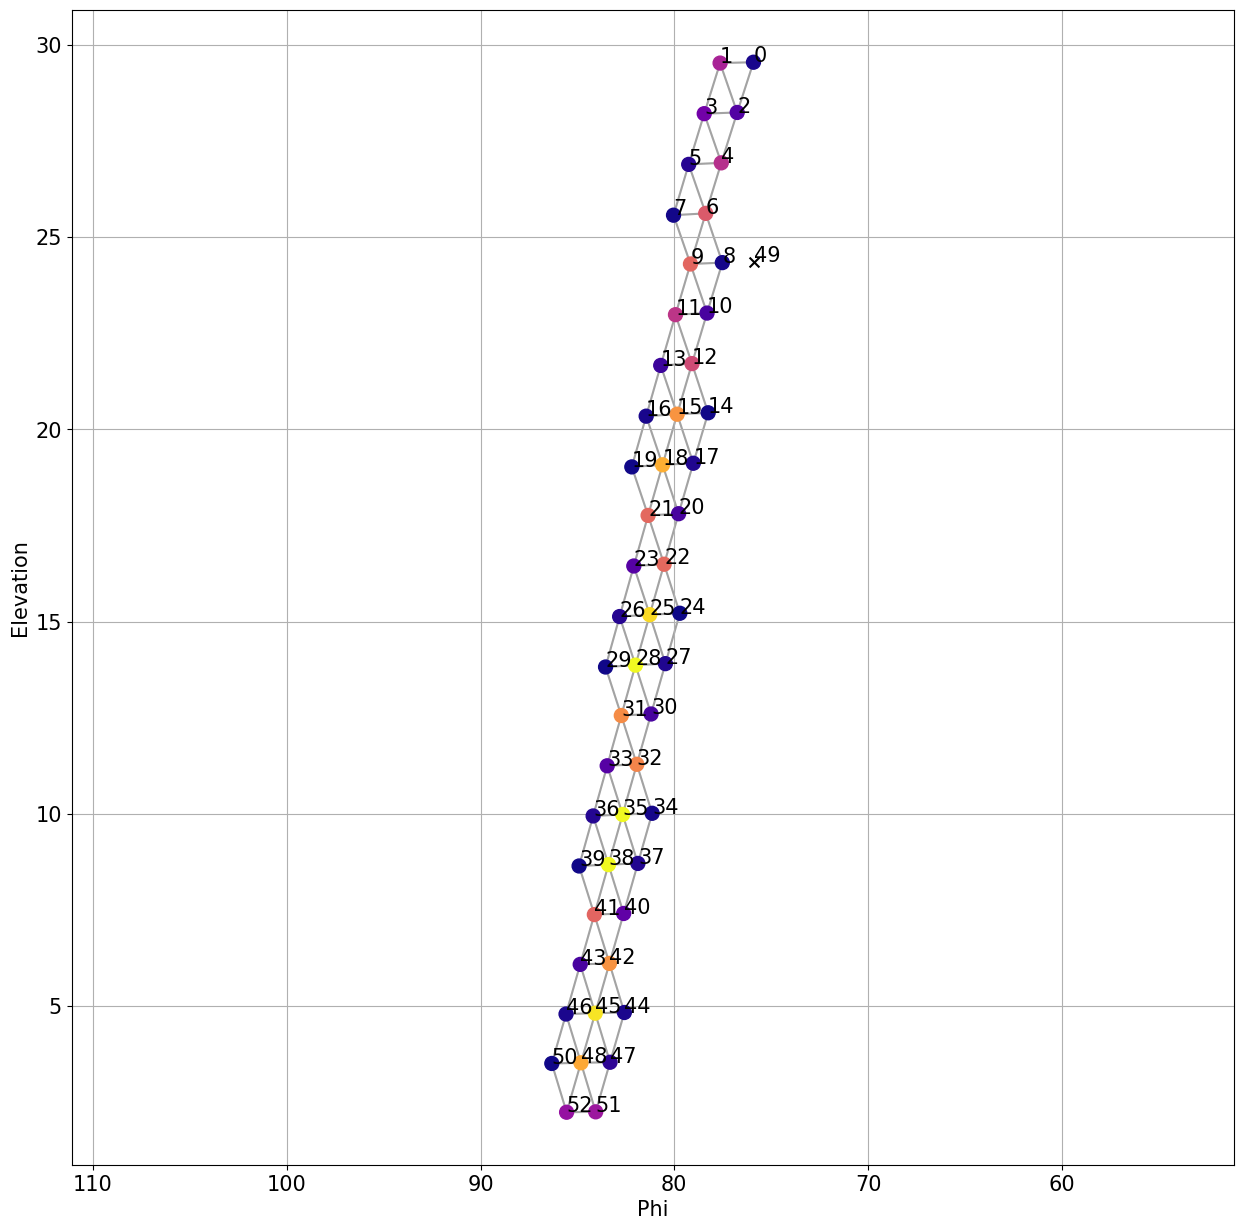

Event 20,  ID: 100050124


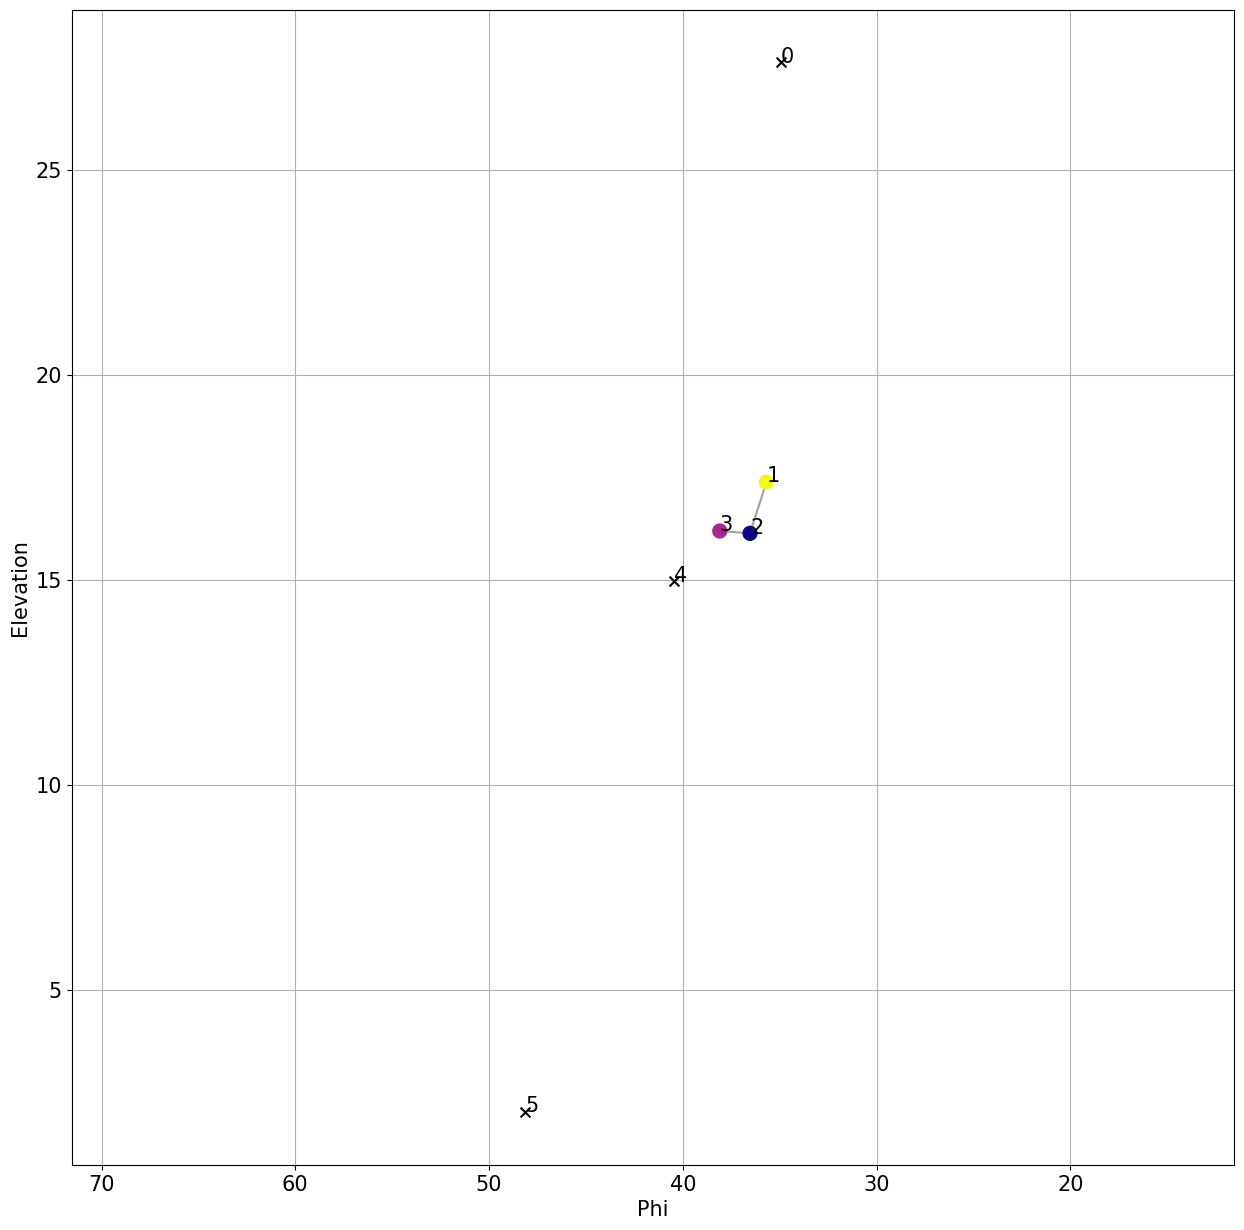

Event 21,  ID: 100000101


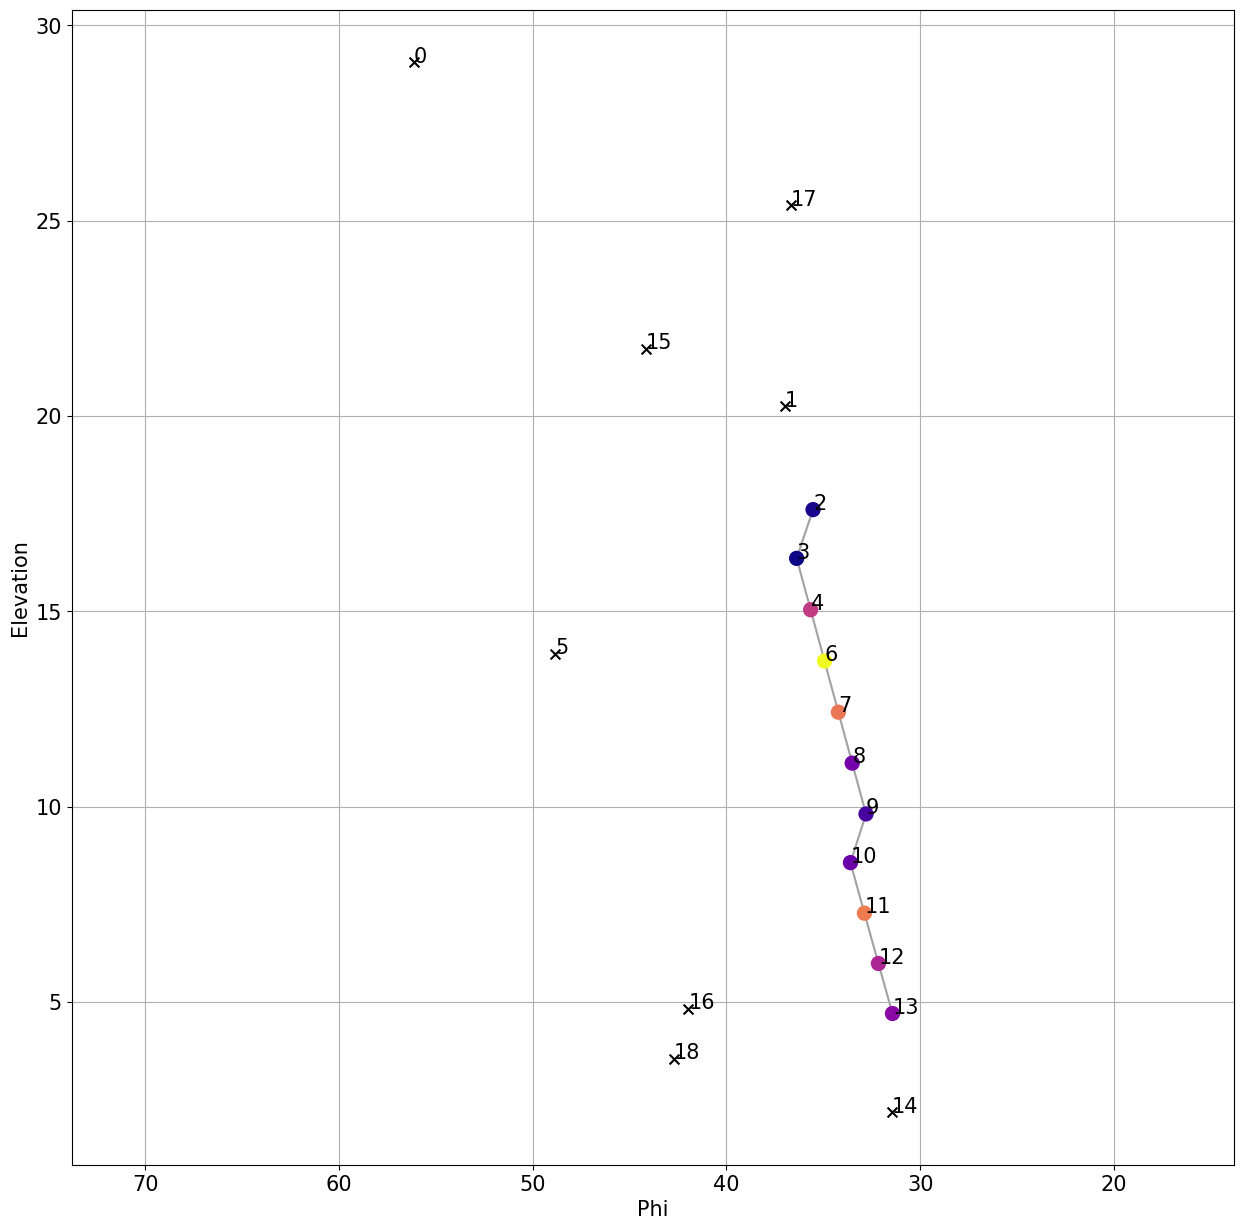

Event 22,  ID: 100000103


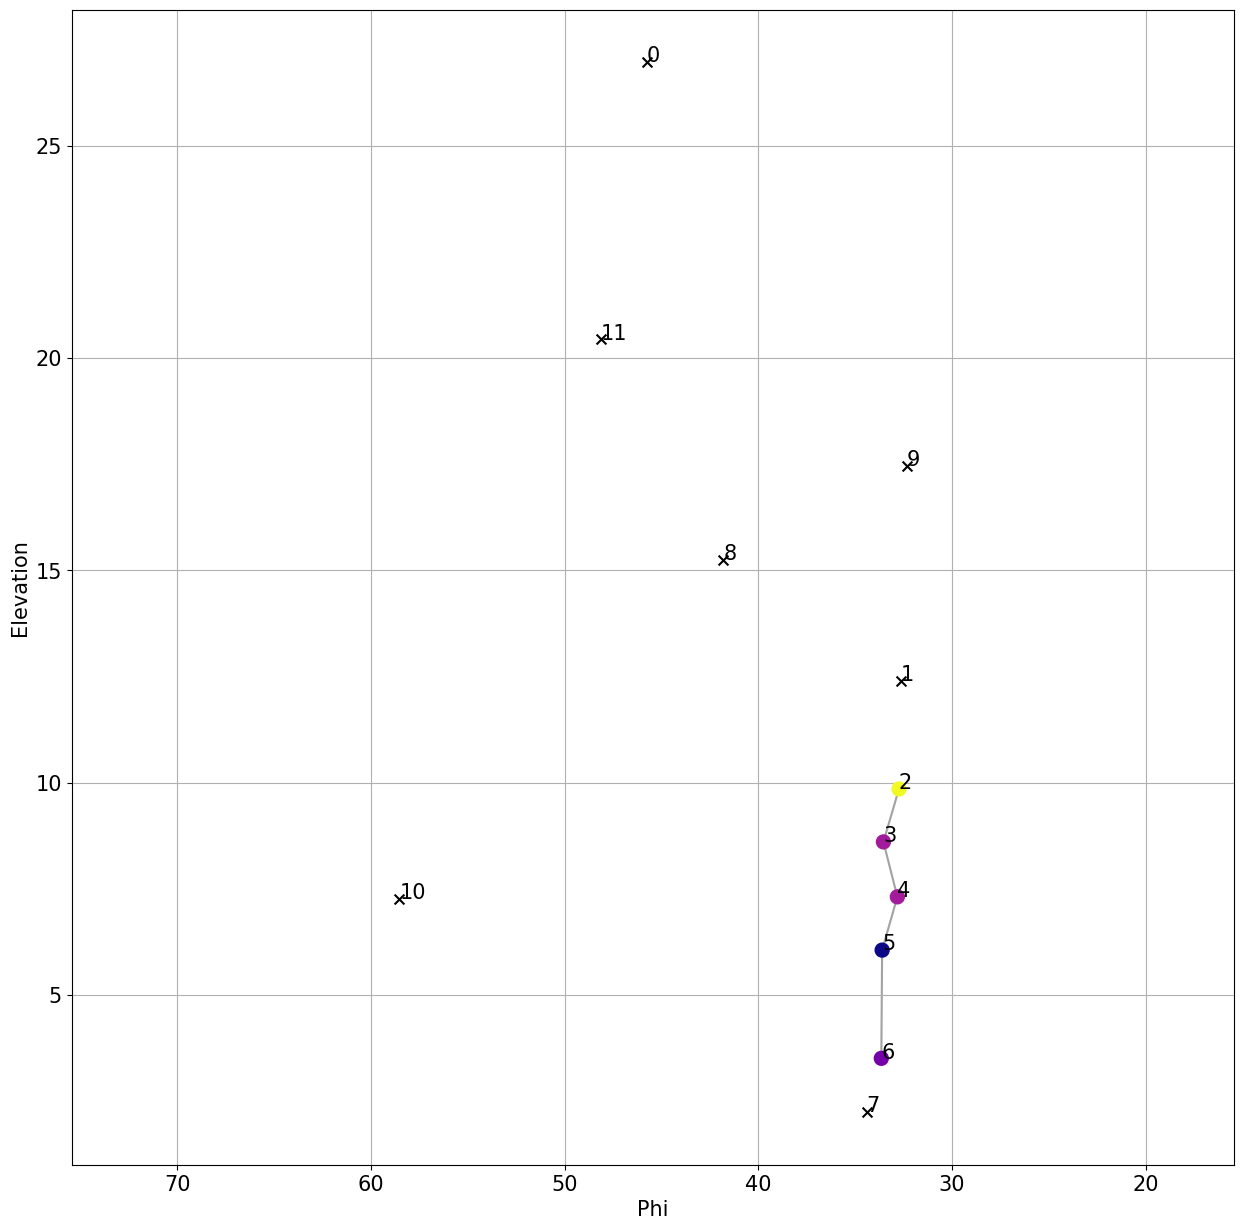

Event 23,  ID: 100000105


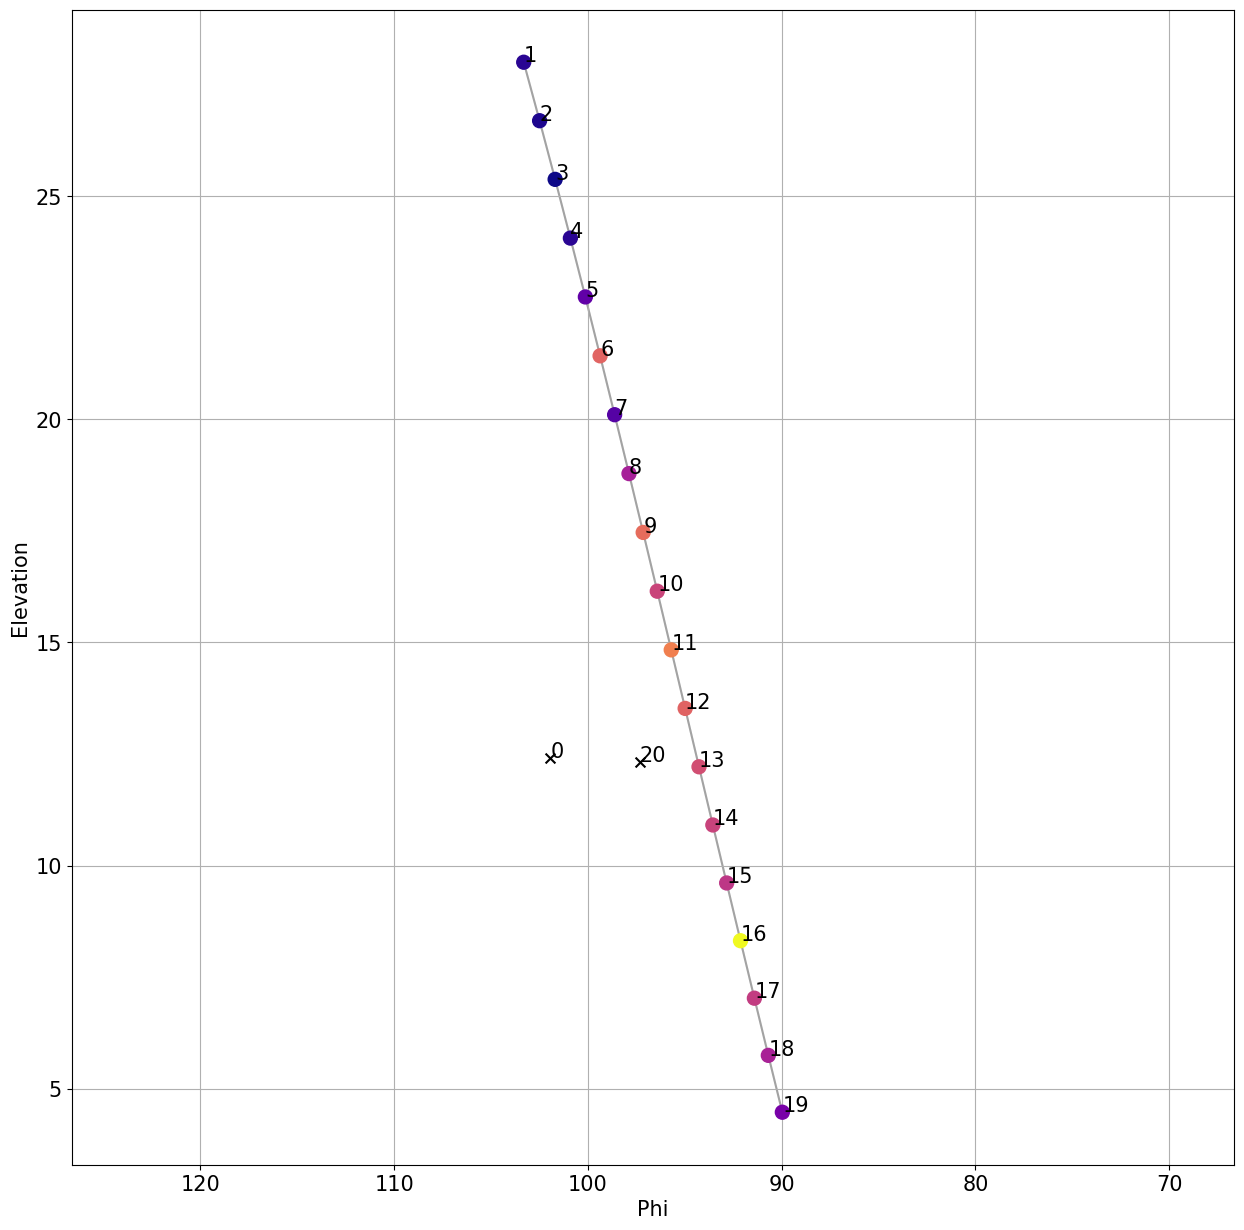

Event 24,  ID: 100000117


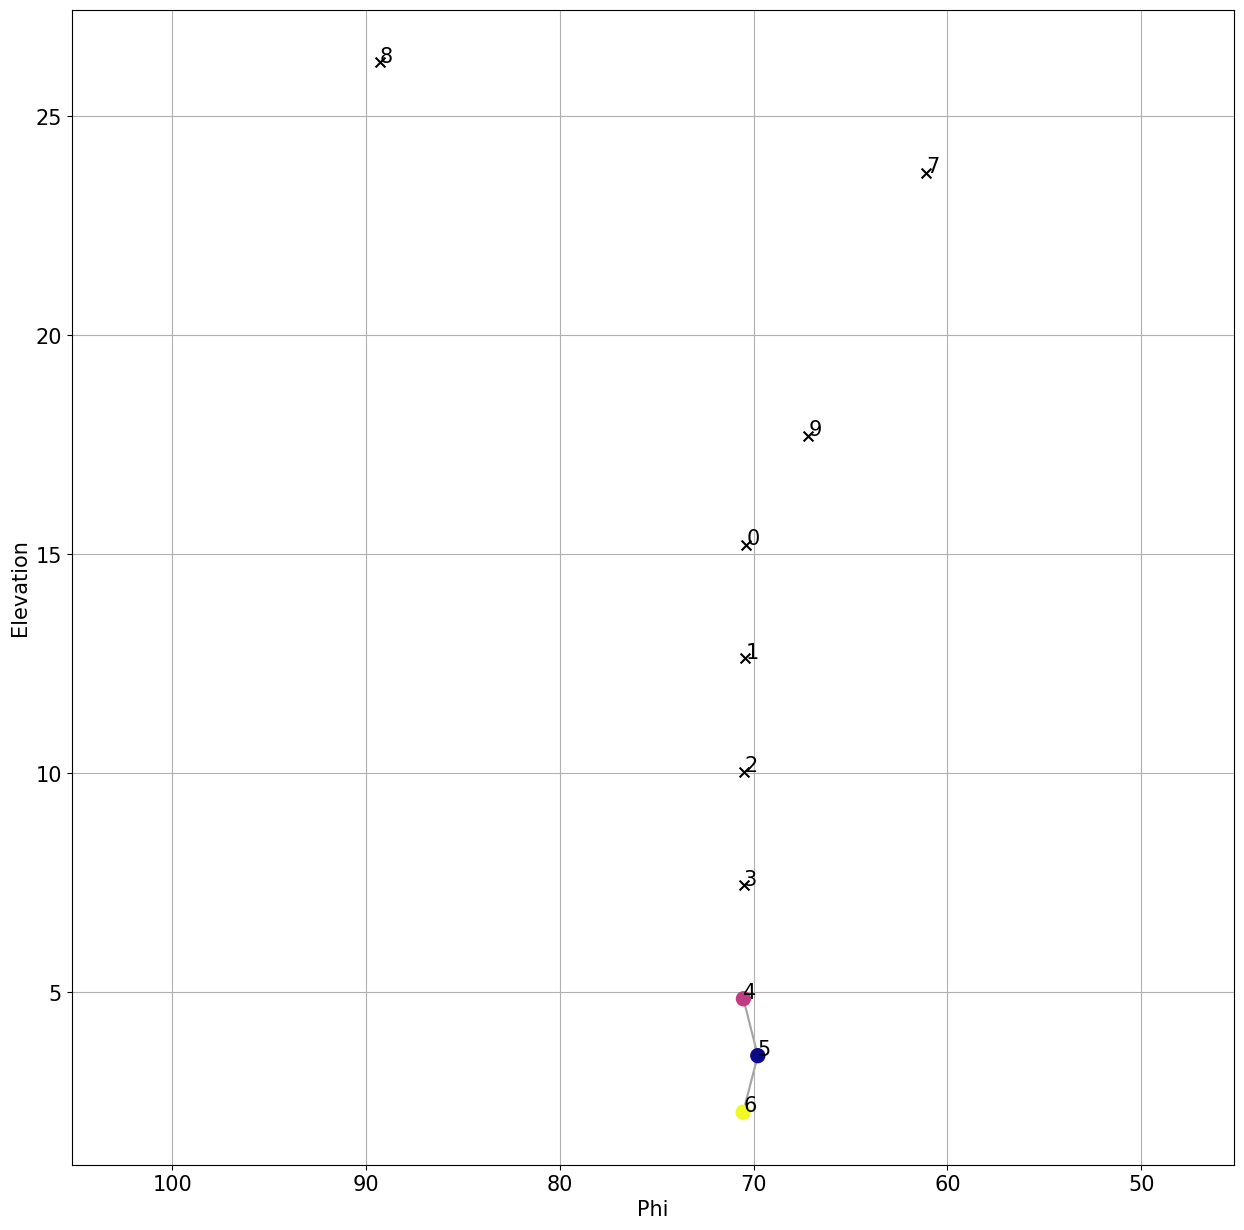

Event 25,  ID: 100000127


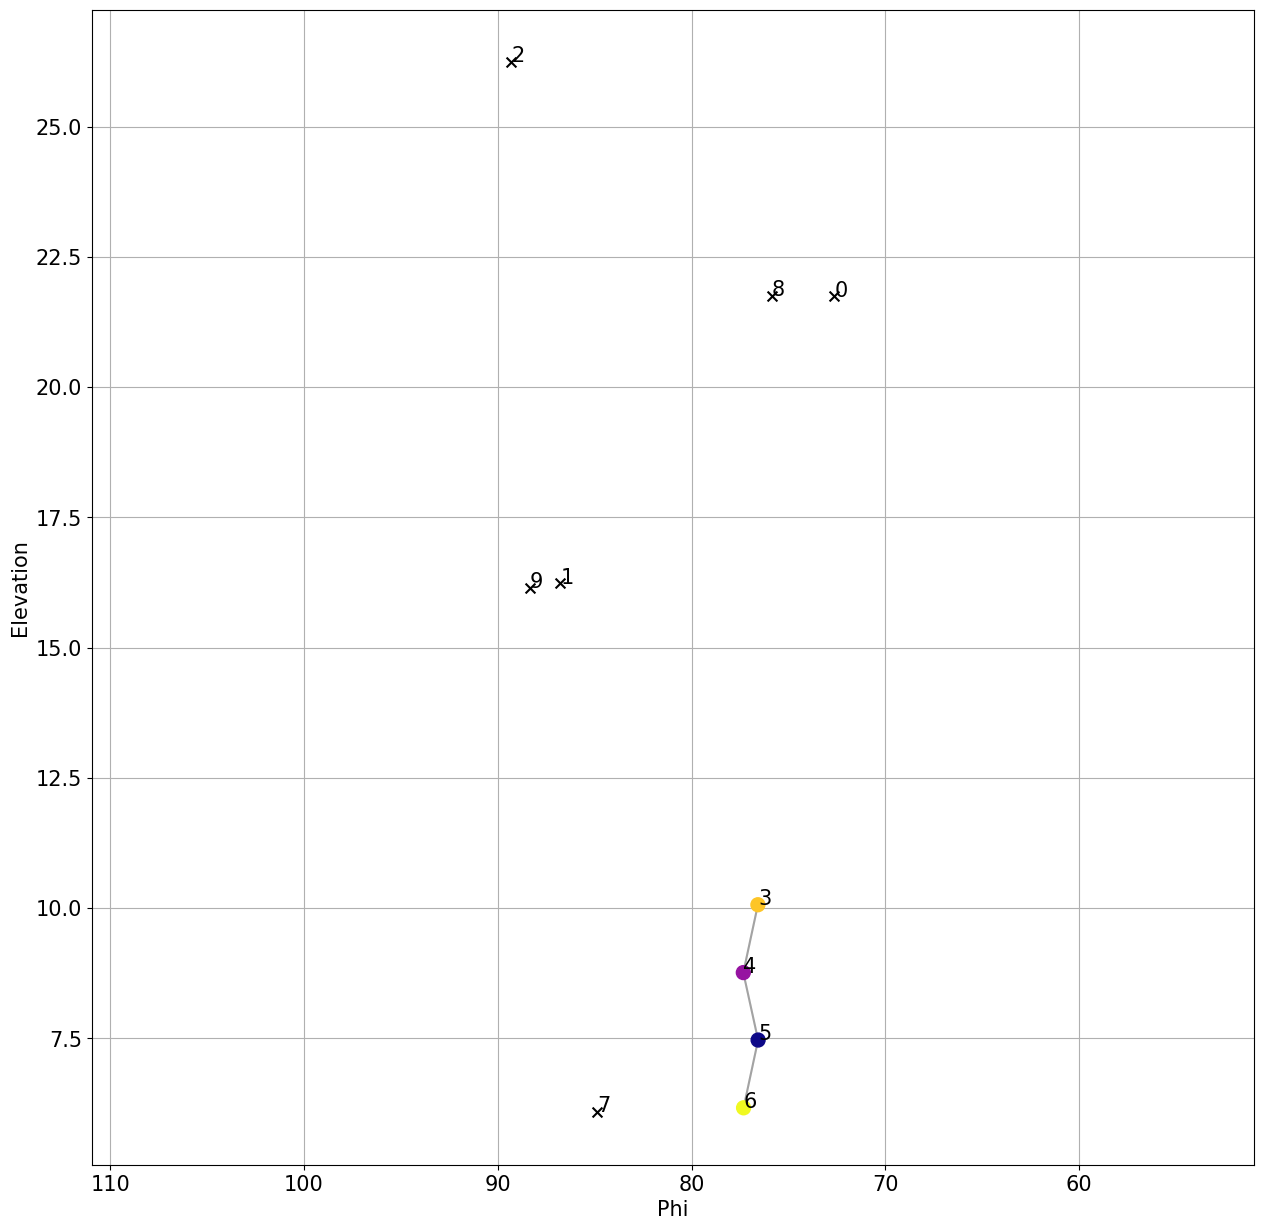

Event 26,  ID: 100010108


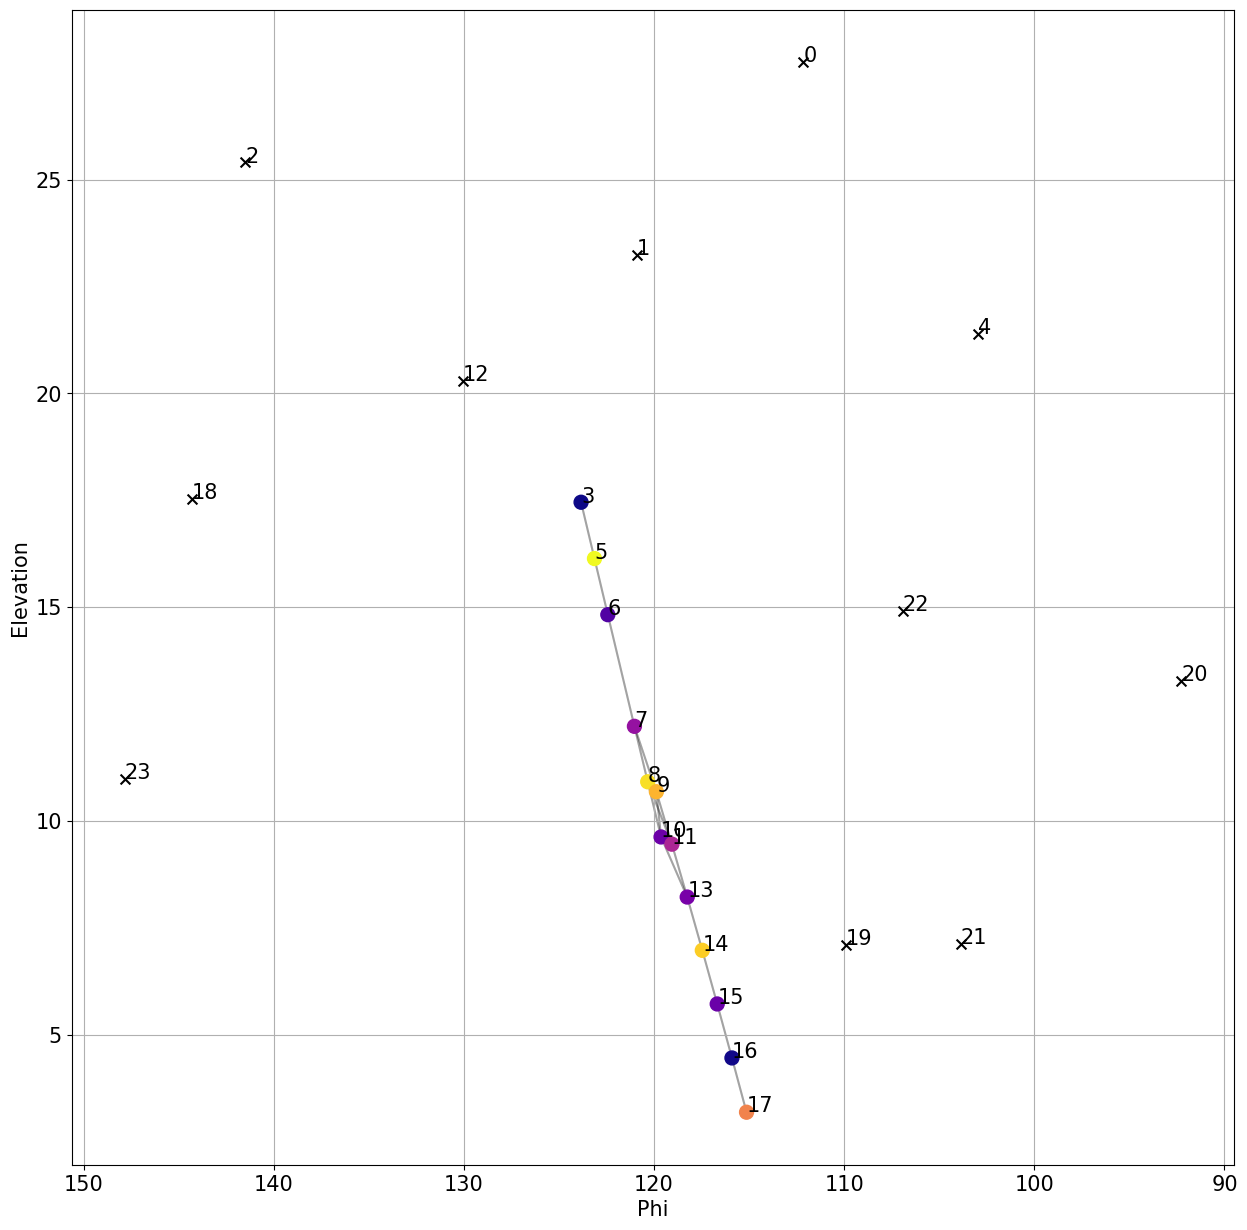

Event 27,  ID: 100010117


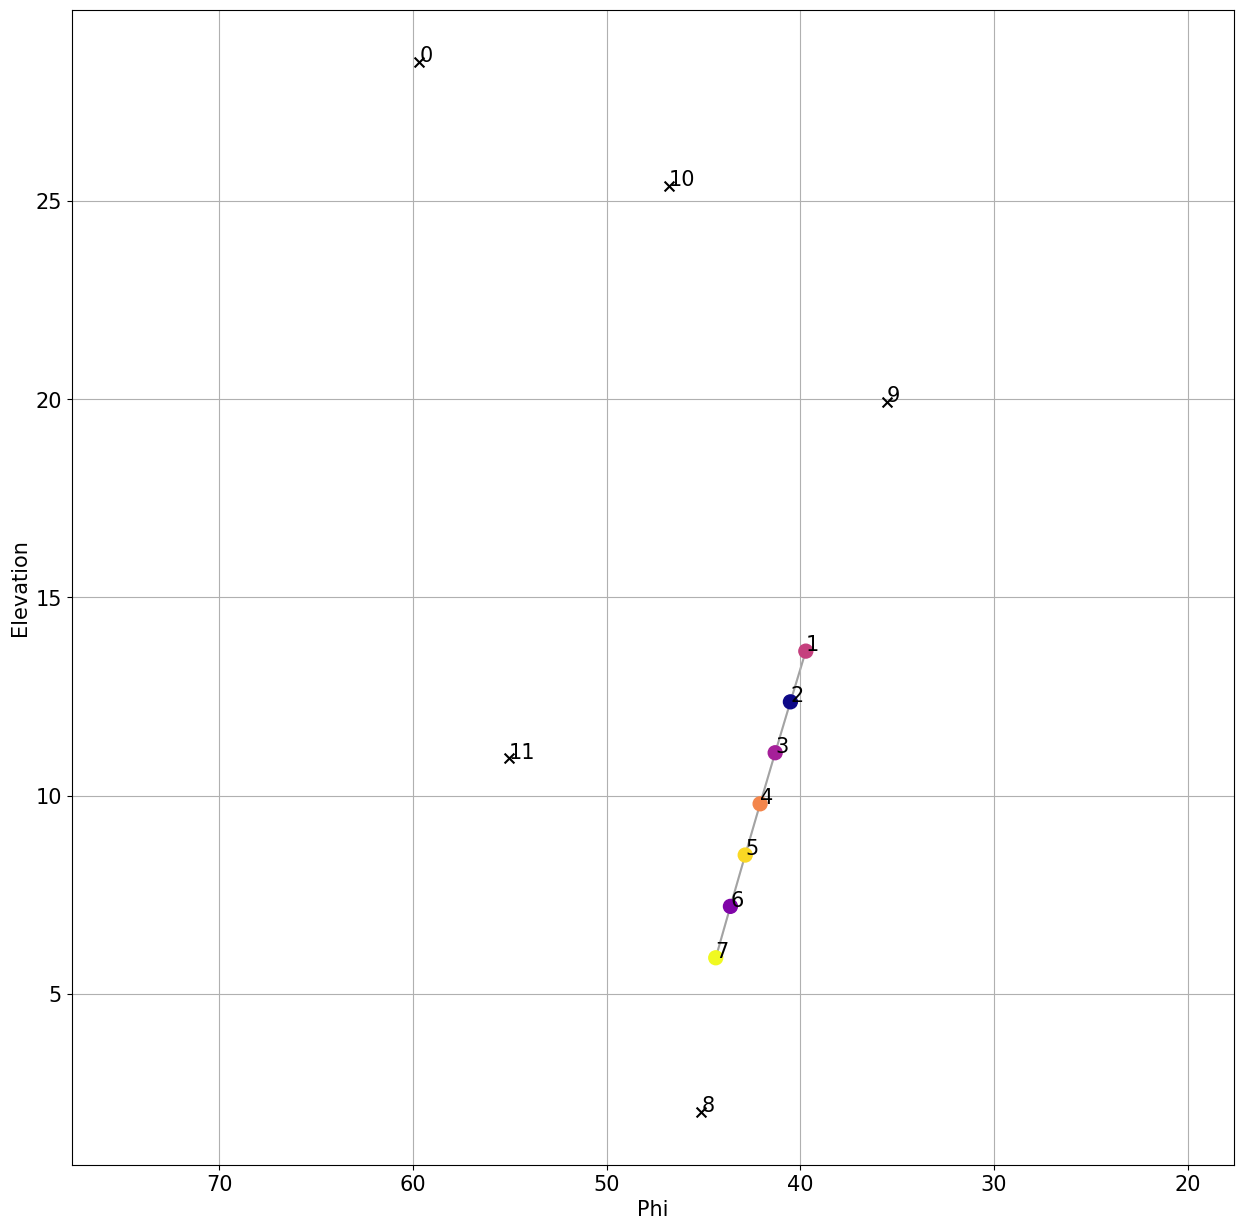

Event 28,  ID: 100040104


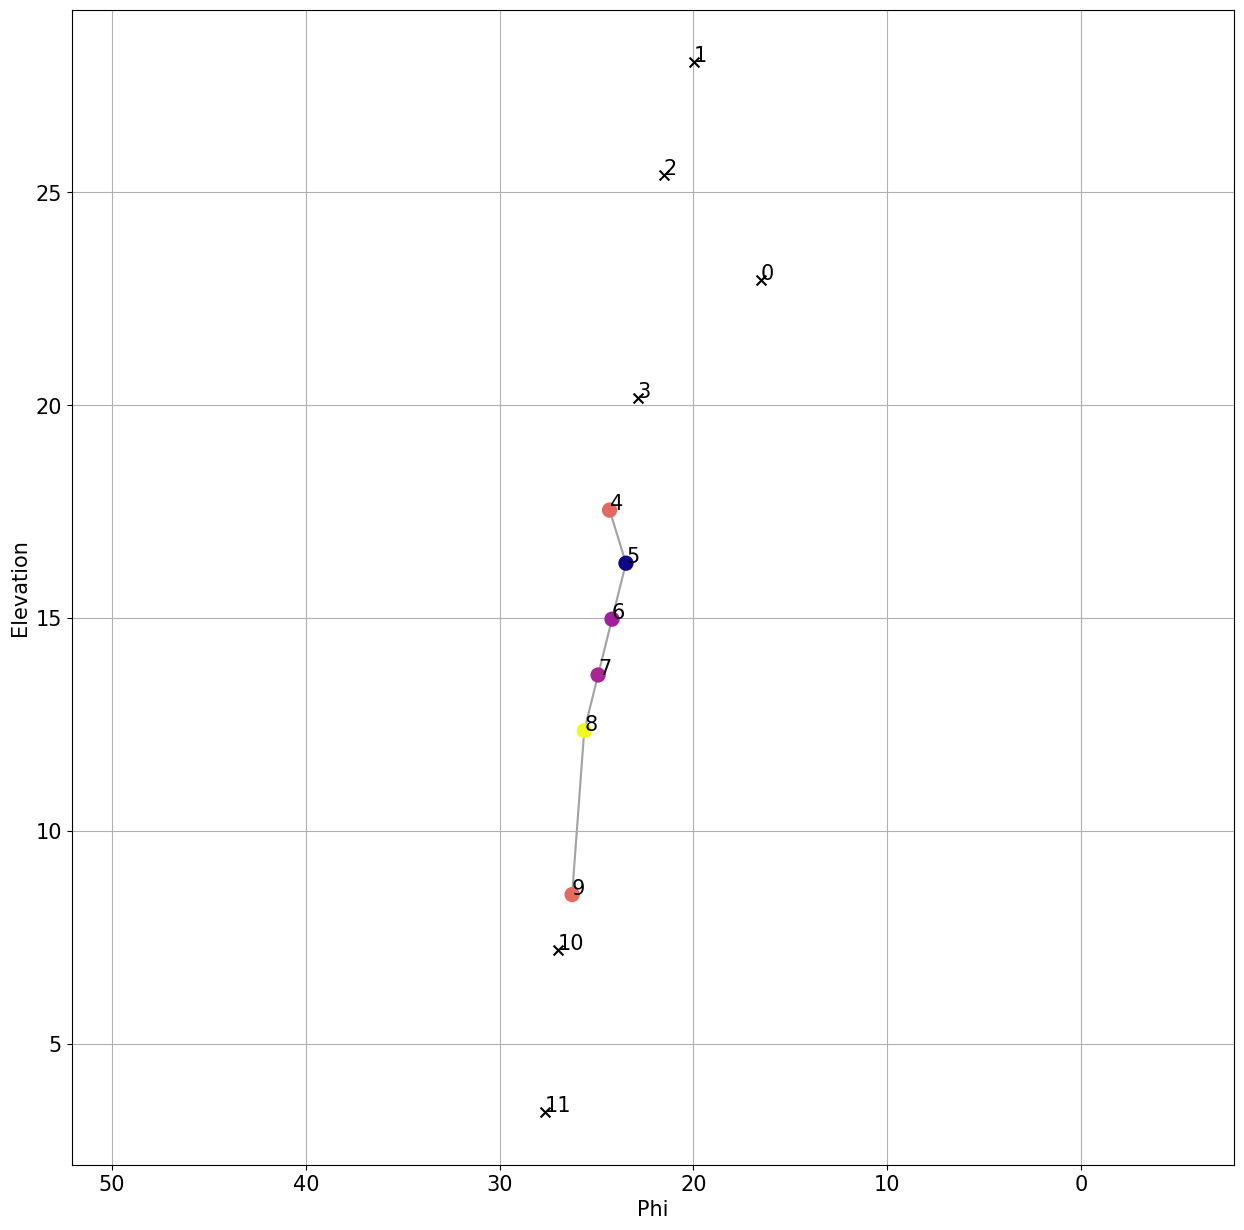

Event 29,  ID: 100050105


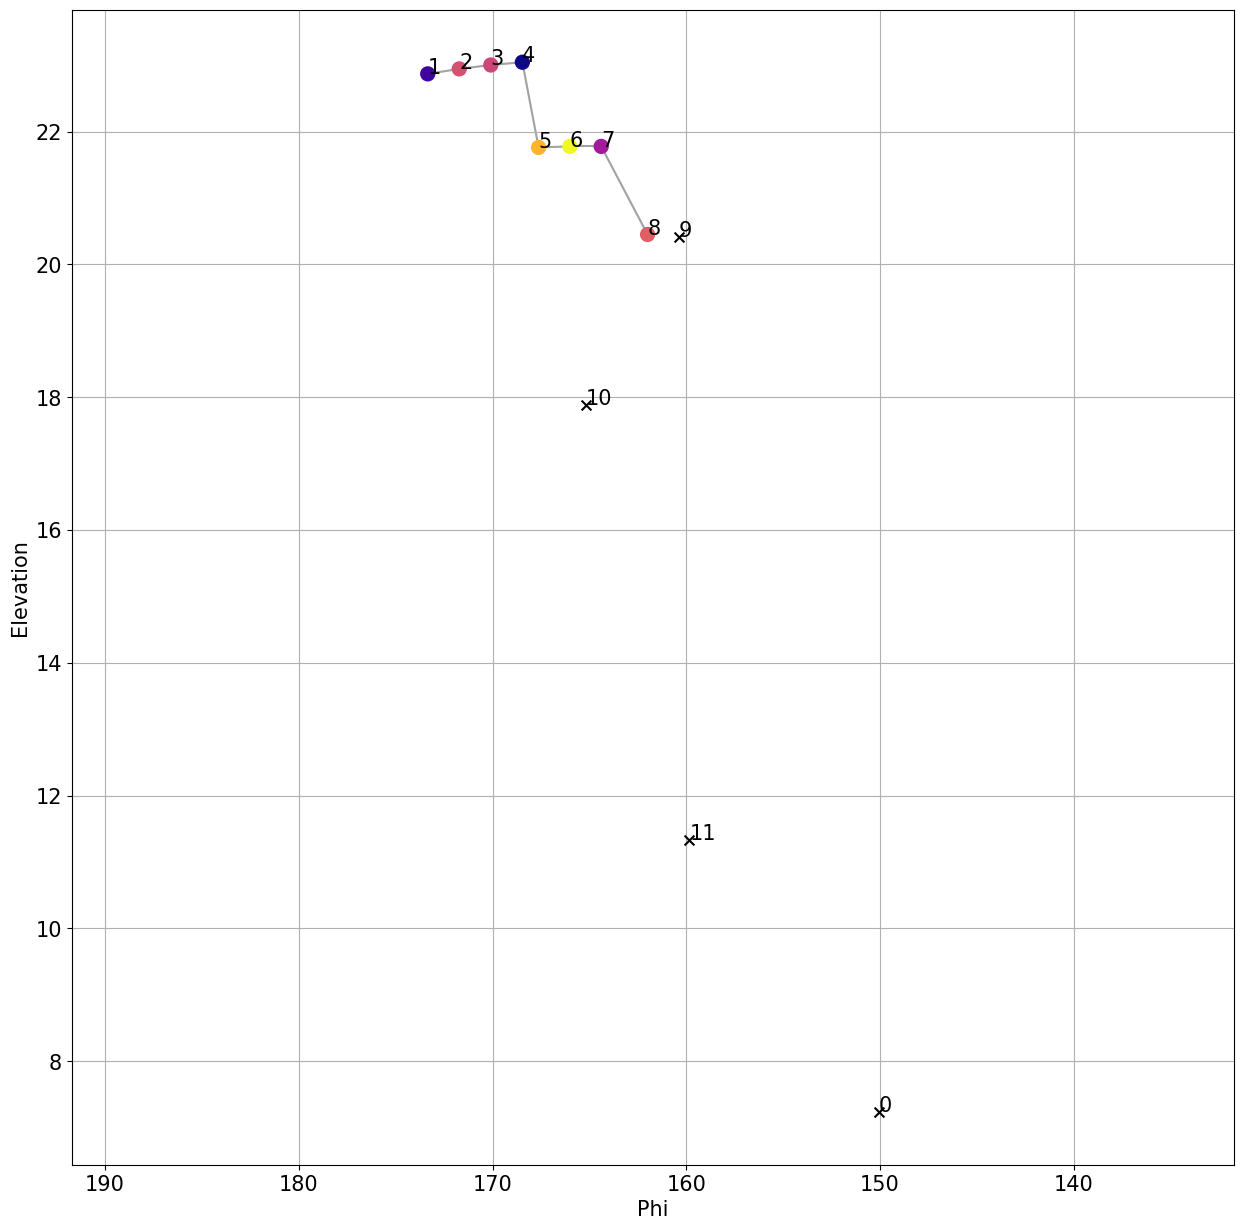

In [13]:
for N in range(30):

    print(f'Event {N},  ID: {EventIDS[N]}')
    Event = Dataset.GetEventsByIndex(N)

    Pixels = Event.PixelObservables.GetPixelData()
    PulseDuration = Pixels[:,8] - Pixels[:,6]
    for i in range(len(Pixels)):
        if Pixels[i,1] in [7.0,8.0,9.0] or Pixels[i,2] == 5.0:
            PulseDuration[i] *= 50
        else:
            PulseDuration[i] *= 100


    ThisData = torch.cat((Pixels[:,[9,10,7]],PulseDuration.reshape(-1,1)),dim=1)
    Adjacency = GetAdjacency(ThisData)

    PlotGraph(Pixels,Adjacency)

In [ ]:
# def GetProcEvent(Pixels,selfloop=None,minchunksize=None,DurationScale=None):
#     '''
#     Will return a used pixels index and edges
#     pixels are (N) array where N is the number of active pixels
#     edges are (M,2) array where M is the number of edges

#     Remember that PixelsIndeces are adresses for their original locations
#     Edges are from 0 to N-1, their new locations. And are semi-independent of the N pixels
#     '''
#     Args = {}
#     if selfloop      is not None: Args['selfloop']      = selfloop
#     if minchunksize  is not None: Args['minchunksize']  = minchunksize
#     if DurationScale is not None: Args['DurationScale'] = DurationScale
#     Adjacency = GetAdjacency(Pixels,**Args)
    
#     # Get used pixels
#     UsedPixels = torch.nonzero(Adjacency.sum(dim=1)).flatten()
#     # Get Edges 
#     Edges = torch.nonzero(Adjacency[:,UsedPixels][UsedPixels,:])

#     return UsedPixels,Edges
    

    